# Water Quality Classification

Downloading the dataset

In [3]:
! kaggle datasets download -d ozgurdogan646/water-quality-dataset
! unzip -o -q water-quality-dataset.zip
! rm water-quality-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/ozgurdogan646/water-quality-dataset
License(s): other
water-quality-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('waterPollution.csv')
df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [ ]:
df.shape

(20000, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      19896 non-null  object 
 10

In [ ]:
df.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,20000.000000,20000.000000,19893.000000,19893.000000,1.989300e+04,20000.000000,19893.000000,19893.000000,19893.000000,19893.000000,...,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
mean,2008.998700,34.444639,149.895102,26.227472,4.919348e+07,0.141400,114206.842878,0.130027,14.859312,4.652609,...,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,1.917859,174.643233,75.994558,6.790095,2.469506e+07,1.922314,144682.517527,0.260679,31.565912,3.444092,...,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,...,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,2008.000000,0.114100,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,...,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,2009.000000,10.975625,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,...,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


In [ ]:
df.isna().sum()

parameterWaterBodyCategory                       0
observedPropertyDeterminandCode                  0
procedureAnalysedFraction                        0
procedureAnalysedMedia                           0
resultUom                                        0
phenomenonTimeReferenceYear                      0
parameterSamplingPeriod                          0
resultMeanValue                                  0
waterBodyIdentifier                              0
Country                                        104
PopulationDensity                              107
TerraMarineProtected_2016_2018                 107
TouristMean_1990_2020                          107
VenueCount                                       0
netMigration_2011_2018                         107
droughts_floods_temperature                    107
literacyRate_2010_2018                         107
combustibleRenewables_2009_2014                107
gdp                                            107
composition_food_organic_waste_

In [ ]:
def isnull_prop(df):
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), (df[col].isnull().sum() / total_rows)]
    return missing_val_dict
null_dict = isnull_prop(df)

df_missing = pd.DataFrame.from_dict(null_dict,
                                    orient="index",
                                    columns=['missing', 'miss_percent'])
df_missing

,missing,miss_percent
parameterWaterBodyCategory,0,0.00000
observedPropertyDeterminandCode,0,0.00000
procedureAnalysedFraction,0,0.00000
procedureAnalysedMedia,0,0.00000
resultUom,0,0.00000
phenomenonTimeReferenceYear,0,0.00000
parameterSamplingPeriod,0,0.00000
resultMeanValue,0,0.00000
waterBodyIdentifier,0,0.00000
Country,104,0.00520


In [ ]:
df['resultUom'].unique()

NameError: name 'df' is not defined

In [ ]:
df['resultMeanValue']

0          0.063310
1          0.046733
2        132.859000
3         11.578376
4          0.206800
            ...    
19995      0.092466
19996     89.908300
19997     18.901608
19998    307.307000
19999      7.954790
Name: resultMeanValue, Length: 20000, dtype: float64

# Data Labeling

Here are some sources where we can find detailed information on water quality standards and thresholds:


1. *Environmental Protection Agency (EPA)*:
   - The EPA sets standards for drinking water quality in the United States, which include maximum contaminant levels (MCLs) for various substances.
   - EPA National Primary Drinking Water Regulations: [EPA Drinking Water Standards](https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations)
   
   Last updated on January 2, 2024

2. *World Health Organization (WHO)*:
   - The WHO provides comprehensive guidelines on drinking water quality, including acceptable limits for various contaminants.
   - WHO Guidelines for Drinking-water Quality: [WHO Drinking Water Quality Guidelines](https://www.who.int/publications/i/item/9789240045064)

  24 April 2017 | Guideline

3. *European Union (EU)*:
   - The EU has its own set of water quality standards, outlined in the Drinking Water Directive.
   - EU Drinking Water Directive: [EU Drinking Water Directive](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32020L2184)
   
   23 Desember 2020

4. *Canadian Council of Ministers of the Environment (CCME)*:
   - The CCME provides guidelines for water quality in Canada, including drinking water and aquatic life protection.
   - CCME Water Quality Guidelines: [CCME Guidelines](https://ccme.ca/en/summary-table)

   Last updated on 2018

5. *Australian Drinking Water Guidelines (ADWG)*:
   - The ADWG provides detailed guidelines for safe drinking water in Australia.
   - Australian Drinking Water Guidelines: [ADWG Guidelines](https://www.nhmrc.gov.au/about-us/publications/australian-drinking-water-guidelines)
   
   Current | 2011


In [ ]:
regulatory_limits = {
    'mg{NO2}/L': (0.0, 1.0),        # Nitrite
    'mg{NO3}/L': (0.0, 10.0),       # Nitrate
    'mg{NH4}/L': (0.0, 0.5),        # Ammonium
    'mg{PO4}/L': (0.0, 0.3),        # Phosphate
    'mg{CaCO3}/L': (0.0, 200.0),    # Calcium Carbonate (hardness)
    'mg{P}/L': (0.0, 0.1),          # Phosphorus
    'mg{N}/L': (0.0, 1.0),          # Nitrogen
    'mg{Si}/L': (0.0, 2.0),         # Silicon
    'mg{O2}/L': (5.0, 14.0),         # Dissolved Oxygen
    'uS/cm': (0.0, 1000.0),         # Conductivity
    # 'mg/L': (0.0, 1.0),             # General parameter, assuming generic pollutants
    'Cel': (0.0, 40.0),             # Temperature
    # 'mg{C}/L': (0.0, 2.0),          # Carbon
    'mg{NH3}/L': (0.0, 0.2),        # Ammonia
    '[pH]': (6.5, 8.5),             # pH value
}

# Function to label the data
def label_water_quality(row, limits):
    uom = row['resultUom']
    value = row['resultMeanValue']

    if uom not in limits:
        return 'undefined'
    elif isinstance(limits[uom], tuple):
        lower_bound, upper_bound = limits[uom]
        if value < lower_bound or value > upper_bound:
            return 'dirty'
        else:
            return 'clean'
    elif value > limits[uom]:
        return 'dirty'
    else:
        return 'clean'

# Apply the function to the DataFrame
df['water_quality'] = df.apply(label_water_quality, axis=1, limits=regulatory_limits)

# Print the DataFrame with the new column 'water_quality'
print(df[['resultUom', 'resultMeanValue', 'water_quality']])

         resultUom  resultMeanValue water_quality
0        mg{NO2}/L         0.063310         clean
1        mg{NO2}/L         0.046733         clean
2      {massRatio}       132.859000     undefined
3        mg{NO3}/L        11.578376         dirty
4           mmol/L         0.206800     undefined
...            ...              ...           ...
19995    mg{NO2}/L         0.092466         clean
19996            %        89.908300     undefined
19997    mg{NO3}/L        18.901608         dirty
19998  {massRatio}       307.307000     undefined
19999         [pH]         7.954790         clean

[20000 rows x 3 columns]


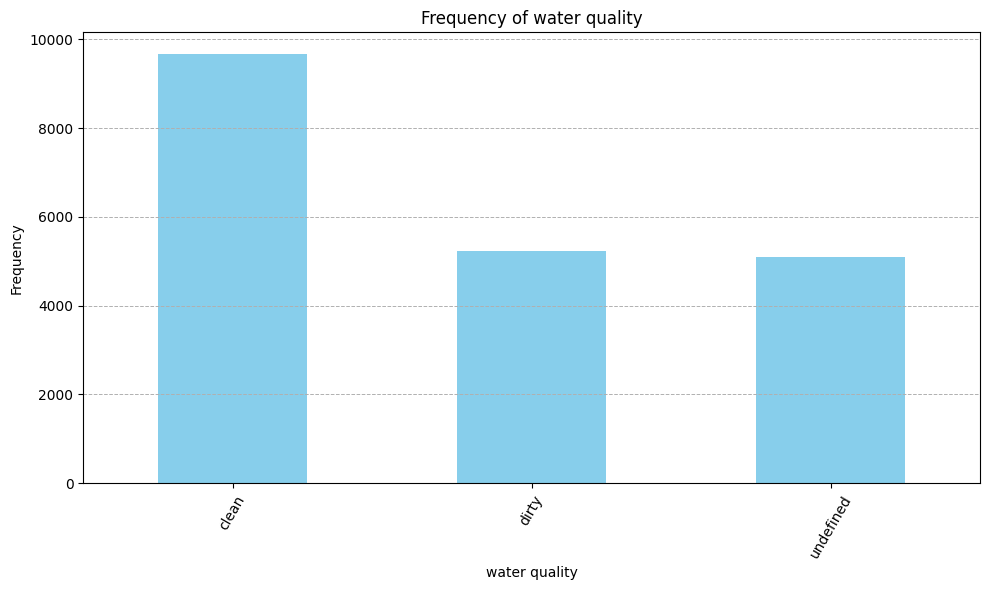

In [ ]:
# Create frequency table for resultUom
frequency_table = df['water_quality'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of water quality')
plt.xlabel('water quality')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df[df['water_quality']  == 'undefined']['observedPropertyDeterminandCode'].value_counts()

observedPropertyDeterminandCode
EEA_3131-01-9     1145
EEA_3164-08-7      886
EEA_3164-07-6      564
EEA_3164-01-0      505
EEA_3133-06-0      464
                  ... 
CAS_218-01-9         1
CAS_120-82-1         1
CAS_7440-62-2        1
CAS_74-83-9          1
CAS_37680-73-2       1
Name: count, Length: 162, dtype: int64

In [ ]:
# df[df['observedPropertyDeterminandCode'] == 'EEA_3151-01-7']['resultMeanValue'].describe()
df[df['observedPropertyDeterminandCode'] == 'EEA_3151-01-7']

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.2068,ES014MSPFES-014-NR-038-000-02-02,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
293,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,1.9880,ES12113,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
296,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,2.6149,ES12120,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
436,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,4.5979,ES030MSPF0427021,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
445,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,4.0010,ES030MSPF0434021,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19535,RW,EEA_3151-01-7,total,water,mmol/L,2010,2010-01--2010-12,5.6943,ES030MSPF0142010,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
19538,RW,EEA_3151-01-7,total,water,mmol/L,2010,2010-01--2010-12,0.7746,ES018MSPFES199MAR001790,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
19608,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,3.1643,ES080MSPF10-11,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined
19621,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,5.6493,ES080MSPF18-26,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,undefined


In [ ]:
regulatory_limits = {
    'EEA_3131-01-9' : (90, 110),
    'EEA_3164-08-7' : (0,10000),
    'EEA_3164-07-6' : (0,10000),
    'EEA_3164-01-0' : (0,10),
    'EEA_3133-06-0' : (0,25)
}

# Function to label the data
def label_water_quality(row, limits):
    x = row['observedPropertyDeterminandCode']
    value = row['resultMeanValue']

    if x not in limits:
        return row['water_quality']
    elif isinstance(limits[x], tuple):
        lower_bound, upper_bound = limits[x]
        if value < lower_bound or value > upper_bound:
            return 'dirty'
        else:
            return 'clean'
    elif value > limits[x]:
        return 'dirty'
    else:
        return 'clean'

# Apply the function to the DataFrame
df['water_quality'] = df.apply(label_water_quality, axis=1, limits=regulatory_limits)

# Print the DataFrame with the new column 'water_quality'
print(df[['observedPropertyDeterminandCode', 'resultMeanValue', 'water_quality']])

      observedPropertyDeterminandCode  resultMeanValue water_quality
0                      CAS_14797-65-0         0.063310         clean
1                      CAS_14797-65-0         0.046733         clean
2                       EEA_3164-07-6       132.859000         clean
3                      CAS_14797-55-8        11.578376         dirty
4                       EEA_3151-01-7         0.206800     undefined
...                               ...              ...           ...
19995                  CAS_14797-65-0         0.092466         clean
19996                   EEA_3131-01-9        89.908300         dirty
19997                  CAS_14797-55-8        18.901608         dirty
19998                   EEA_3164-08-7       307.307000         clean
19999                   EEA_3152-01-0         7.954790         clean

[20000 rows x 3 columns]


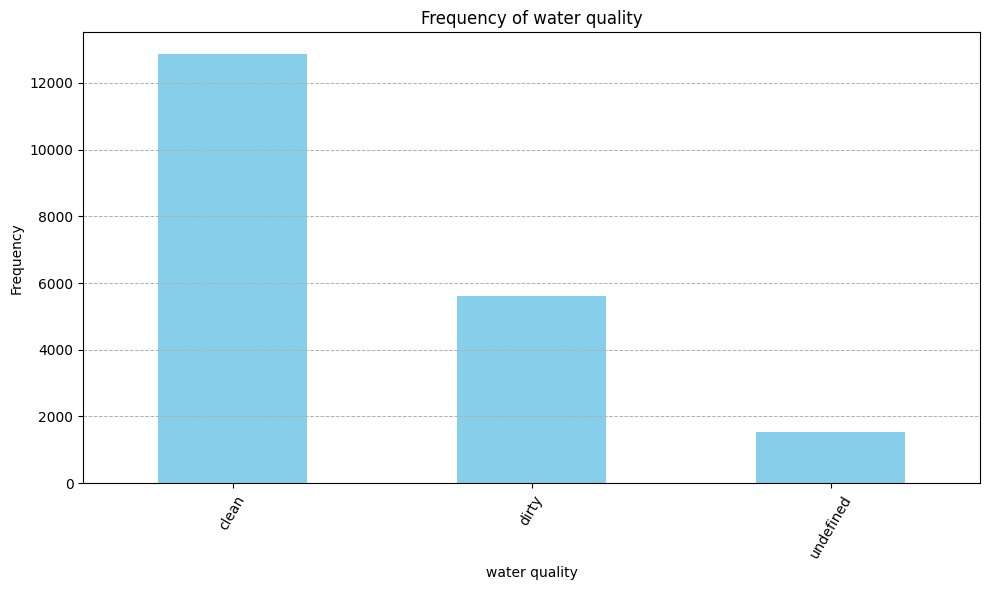

In [ ]:
# Create frequency table for resultUom
frequency_table = df['water_quality'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of water quality')
plt.xlabel('water quality')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df = df[df['water_quality'] != 'undefined'].copy()

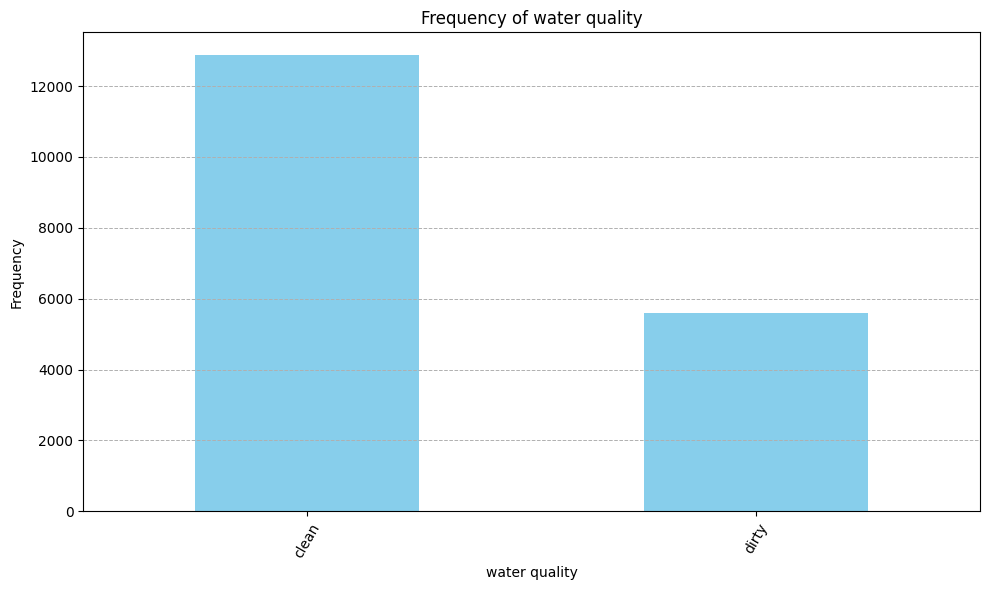

In [ ]:
# Create frequency table for resultUom
frequency_table = df['water_quality'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of water quality')
plt.xlabel('water quality')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

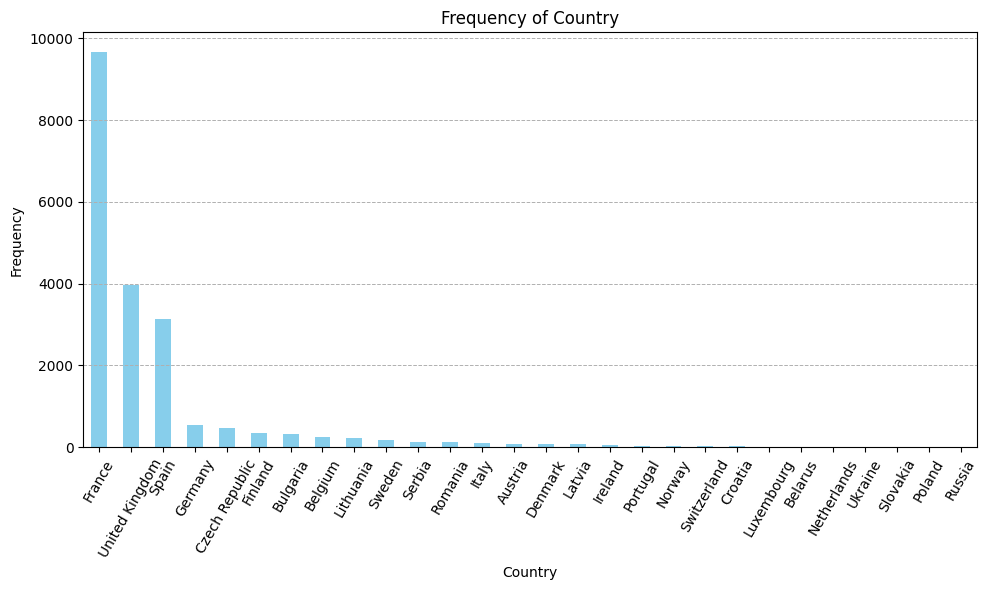

In [ ]:
# Create frequency table for resultUom
frequency_table = df['Country'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

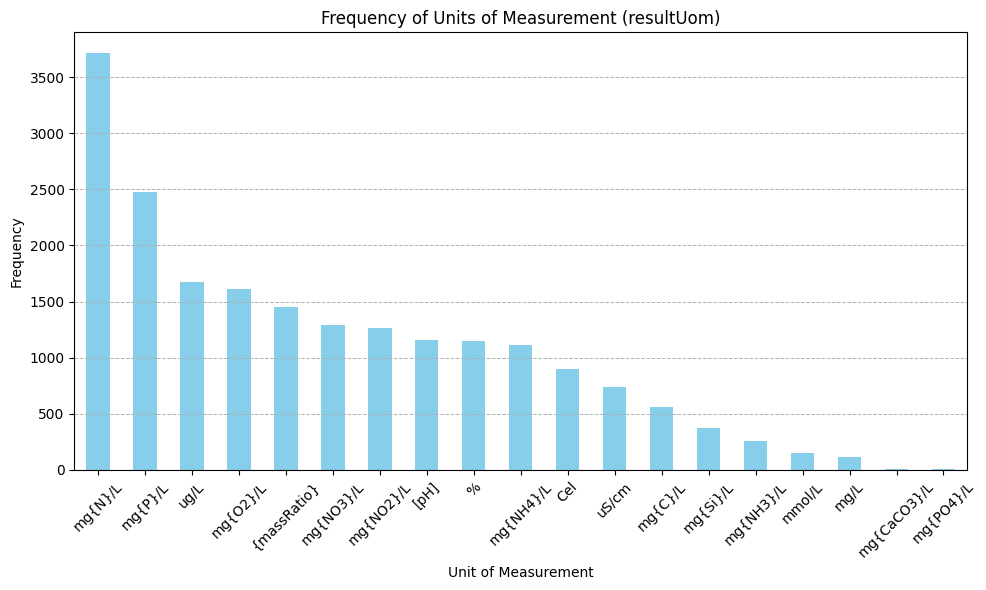

In [ ]:
# Create frequency table for resultUom
frequency_table = df['resultUom'].value_counts()

# Plot the frequency table
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar', color='skyblue')
plt.title('Frequency of Units of Measurement (resultUom)')
plt.xlabel('Unit of Measurement')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df['observedPropertyDeterminandCode'].unique()

array(['CAS_14797-65-0', 'EEA_3164-07-6', 'CAS_14797-55-8',
       'EEA_3151-01-7', 'CAS_7723-14-0', 'EEA_3164-08-7', 'EEA_3131-01-9',
       'EEA_3161-03-3', 'EEA_3152-01-0', 'EEA_3163-01-7', 'EEA_3133-01-5',
       'CAS_14265-44-2', 'EEA_3161-01-1', 'EEA_3161-05-5',
       'CAS_14798-03-9', 'EEA_3164-01-0', 'EEA_3142-01-6',
       'CAS_7440-43-9', 'CAS_16887-00-6', 'CAS_67-66-3', 'EEA_31615-01-7',
       'EEA_3121-01-5', 'EEA_3161-02-2', 'CAS_2921-88-2',
       'CAS_35065-27-1', 'CAS_35065-29-3', 'CAS_608-93-5', 'CAS_127-18-4',
       'CAS_1610-18-0', 'CAS_7287-19-6', 'CAS_7440-66-6', 'CAS_7429-90-5',
       'EEA_3133-03-7', 'EEA_3133-02-6', 'EEA_3133-06-0', 'CAS_330-54-1',
       'CAS_959-98-8', 'CAS_33213-65-9', 'CAS_15307-86-5',
       'EEA_3133-04-8', 'EEA_31613-01-1', 'CAS_7439-92-1', 'CAS_50-32-8',
       'CAS_205-99-2', 'CAS_191-24-2', 'CAS_207-08-9', 'CAS_206-44-0',
       'CAS_319-84-6', 'CAS_319-85-7', 'CAS_319-86-8', 'CAS_76-44-8',
       'CAS_1024-57-3', 'CAS_124495-18-7'

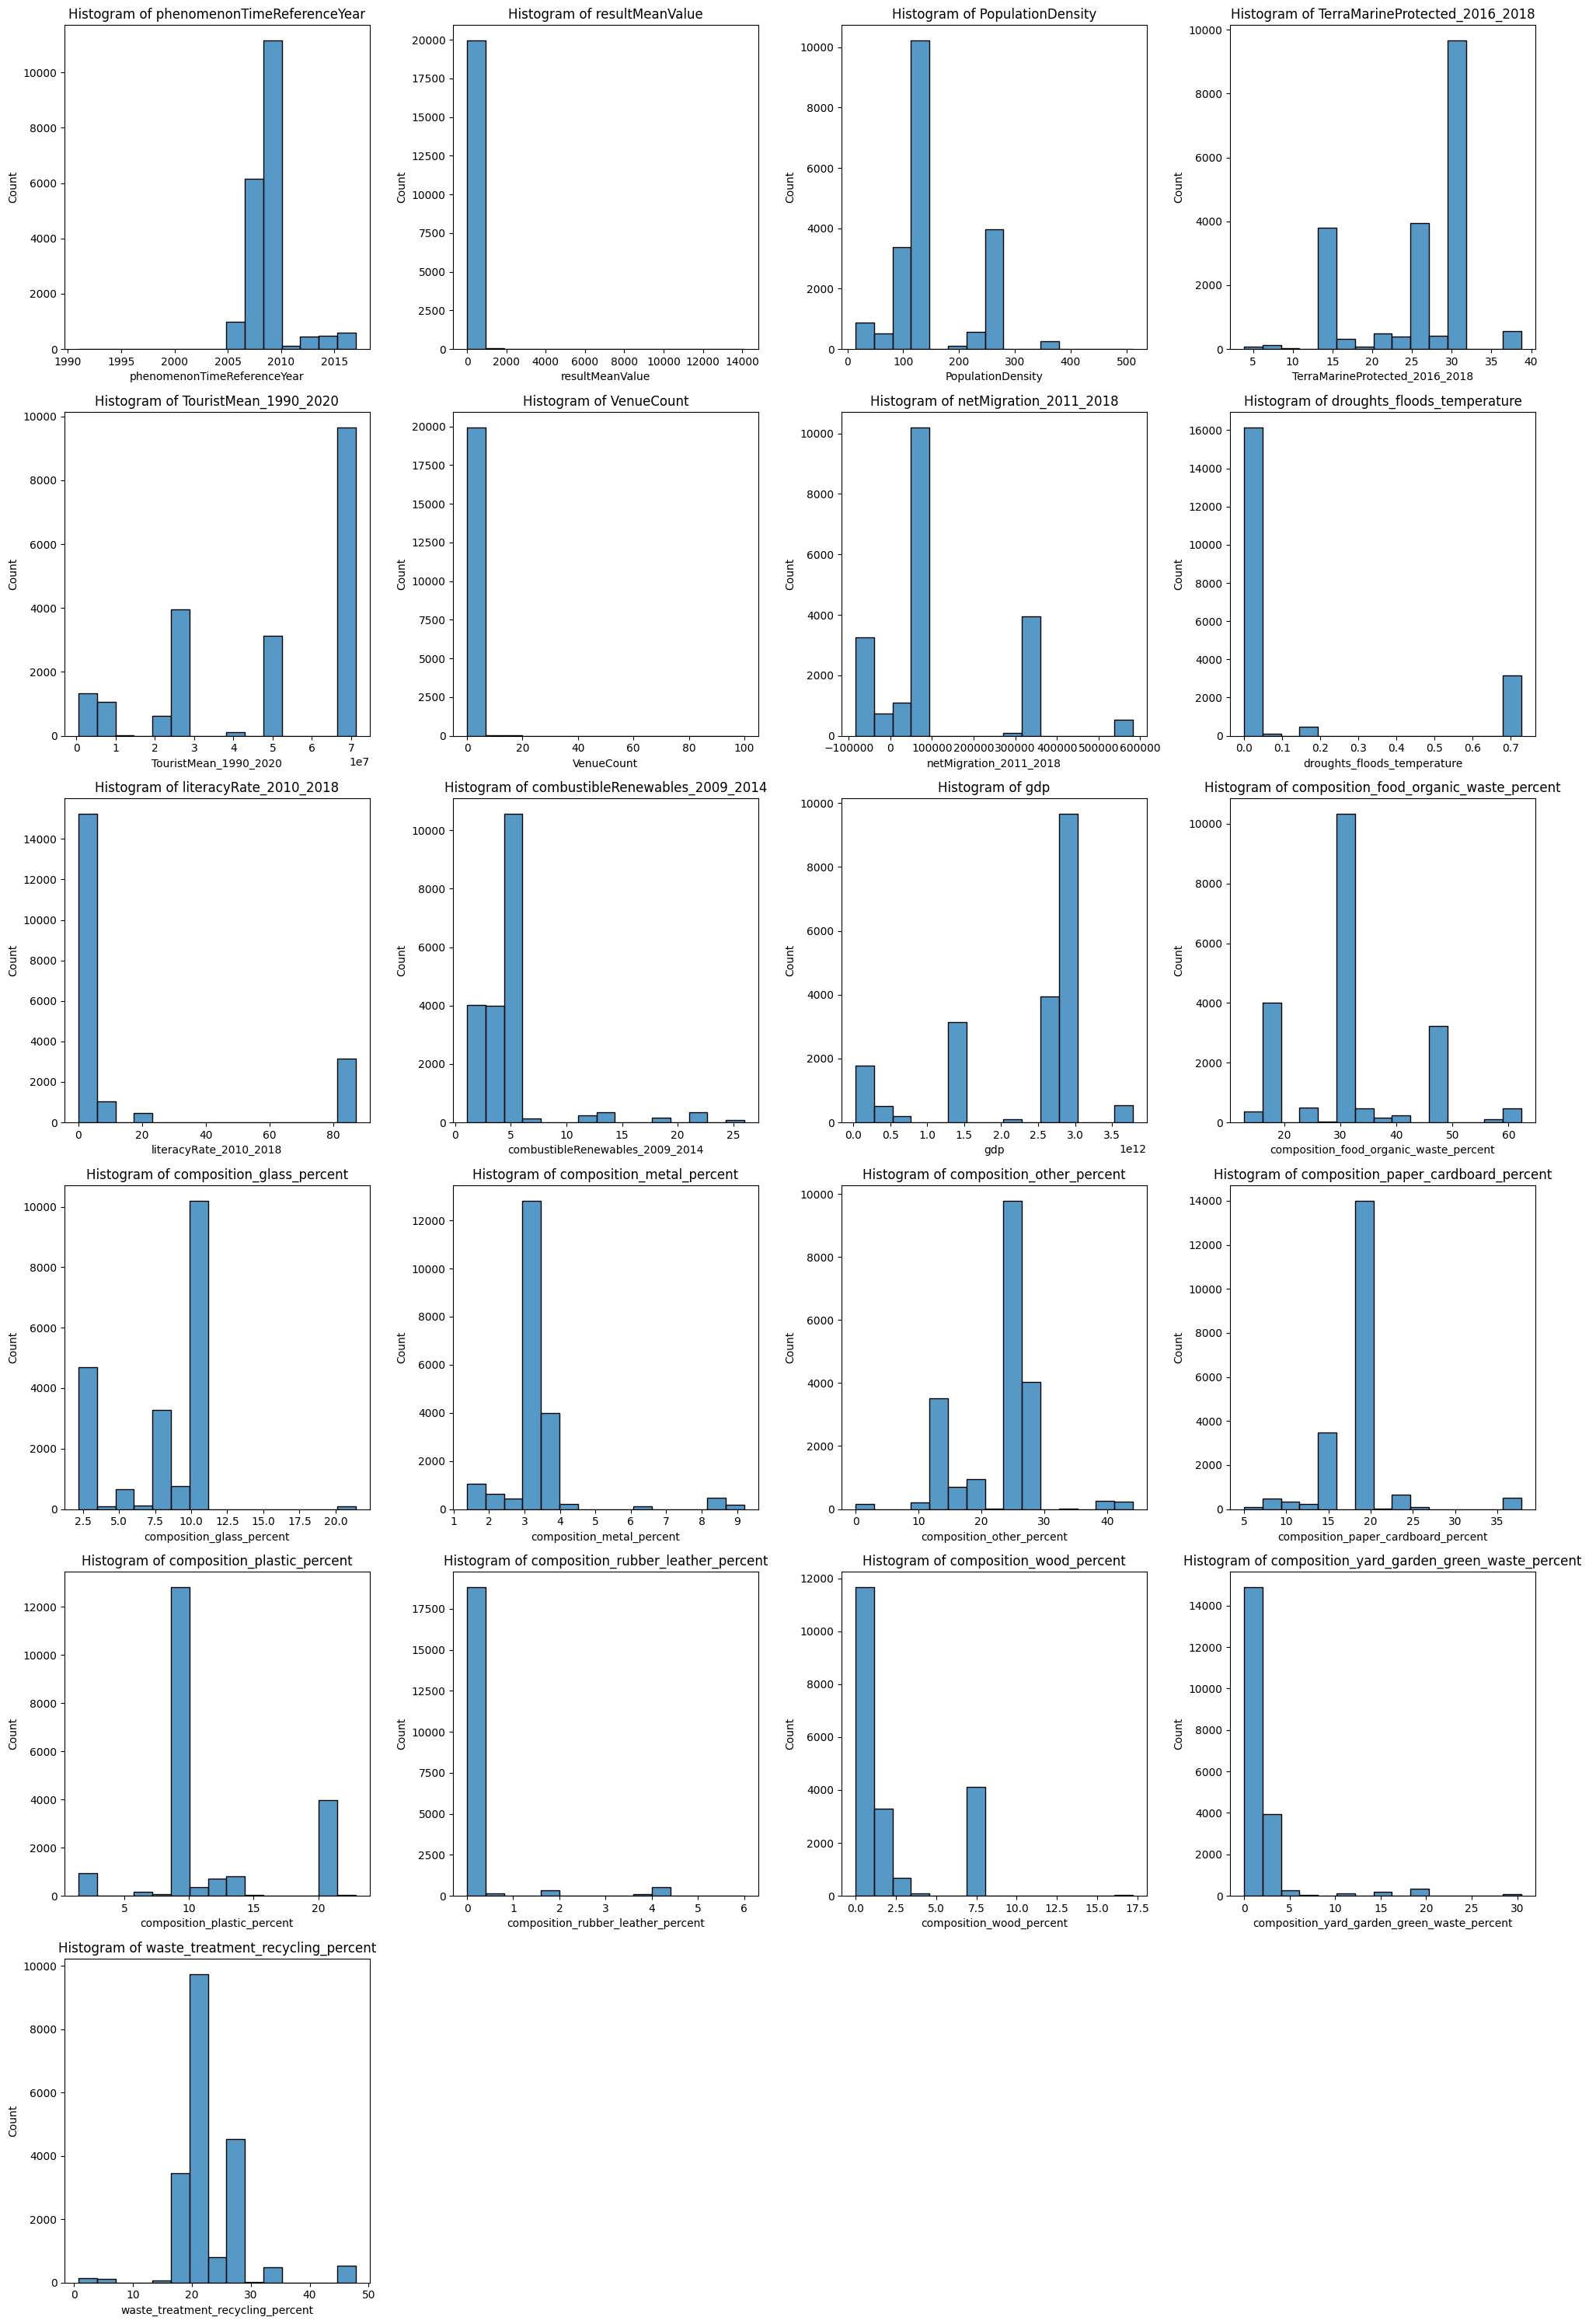

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 4)

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=15, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

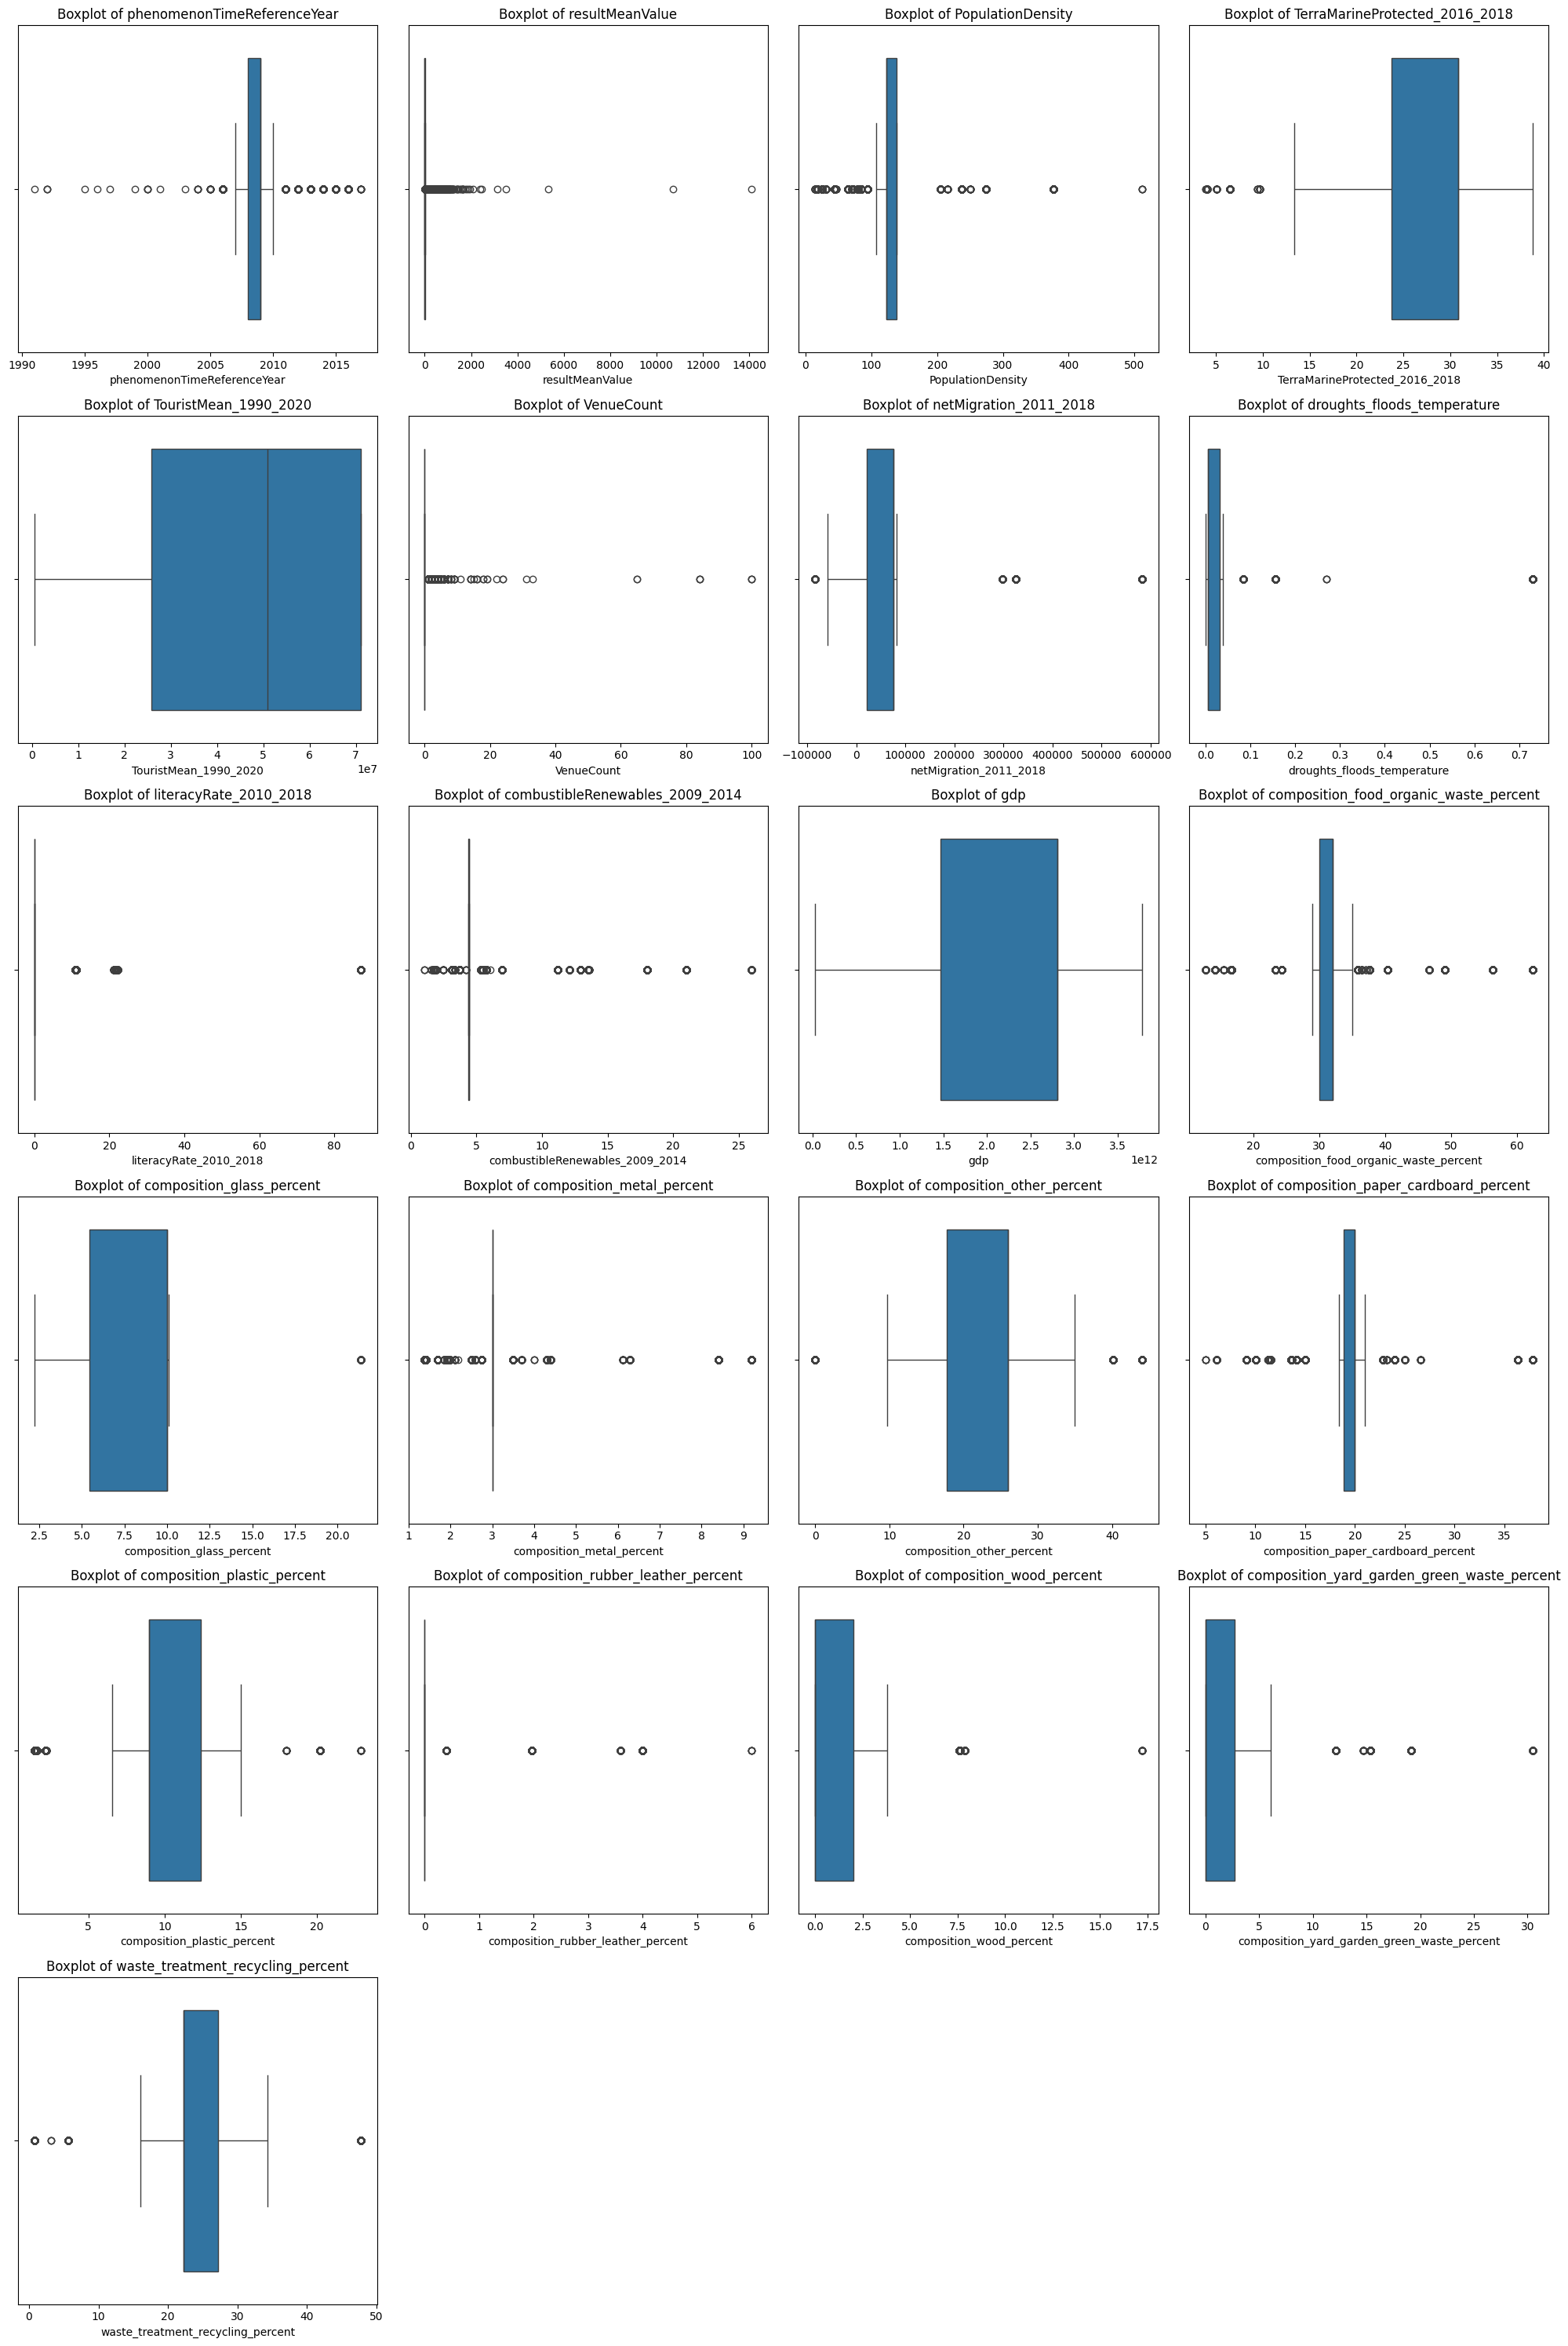

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 4)

fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df.dropna(subset=['Country'], inplace=True)

In [ ]:
df.isna().sum()

parameterWaterBodyCategory                     0
observedPropertyDeterminandCode                0
procedureAnalysedFraction                      0
procedureAnalysedMedia                         0
resultUom                                      0
phenomenonTimeReferenceYear                    0
parameterSamplingPeriod                        0
resultMeanValue                                0
waterBodyIdentifier                            0
Country                                        0
PopulationDensity                              3
TerraMarineProtected_2016_2018                 3
TouristMean_1990_2020                          3
VenueCount                                     0
netMigration_2011_2018                         3
droughts_floods_temperature                    3
literacyRate_2010_2018                         3
combustibleRenewables_2009_2014                3
gdp                                            3
composition_food_organic_waste_percent         3
composition_glass_pe

In [ ]:
# Columns with NaNs that we are interested in
columns_with_nans = [
    'PopulationDensity', 'TerraMarineProtected_2016_2018', 'TouristMean_1990_2020',
    'netMigration_2011_2018', 'droughts_floods_temperature', 'literacyRate_2010_2018',
    'combustibleRenewables_2009_2014', 'gdp', 'composition_food_organic_waste_percent',
    'composition_glass_percent', 'composition_metal_percent', 'composition_other_percent',
    'composition_paper_cardboard_percent', 'composition_plastic_percent',
    'composition_rubber_leather_percent', 'composition_wood_percent',
    'composition_yard_garden_green_waste_percent', 'waste_treatment_recycling_percent'
]

# Filter the DataFrame to show rows with missing values in the specified columns
missing_data = df[df[columns_with_nans].isna().any(axis=1)]

# Display the rows with missing data
missing_data


,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
4768,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2008,2008-01--2008-12,0.044888,SKD0016,Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clean
4769,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2008,2008-01--2008-12,0.055836,SKD0018,Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clean
18933,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2006,2006-01--2006-12,13.561362,LT150100016,Russia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dirty


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18367 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   18367 non-null  object 
 1   observedPropertyDeterminandCode              18367 non-null  object 
 2   procedureAnalysedFraction                    18367 non-null  object 
 3   procedureAnalysedMedia                       18367 non-null  object 
 4   resultUom                                    18367 non-null  object 
 5   phenomenonTimeReferenceYear                  18367 non-null  int64  
 6   parameterSamplingPeriod                      18367 non-null  object 
 7   resultMeanValue                              18367 non-null  float64
 8   waterBodyIdentifier                          18367 non-null  object 
 9   Country                                      18367 non-null  object 
 10  Pop

In [ ]:
# Replace 'clean' with 1 and 'dirty' with 0
df['water_quality'] = df['water_quality'].replace({'clean': 0, 'dirty': 1})

df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
5,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,2.477792,ES014MSPFES-014-NR-038-000-02-02,Spain,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,0


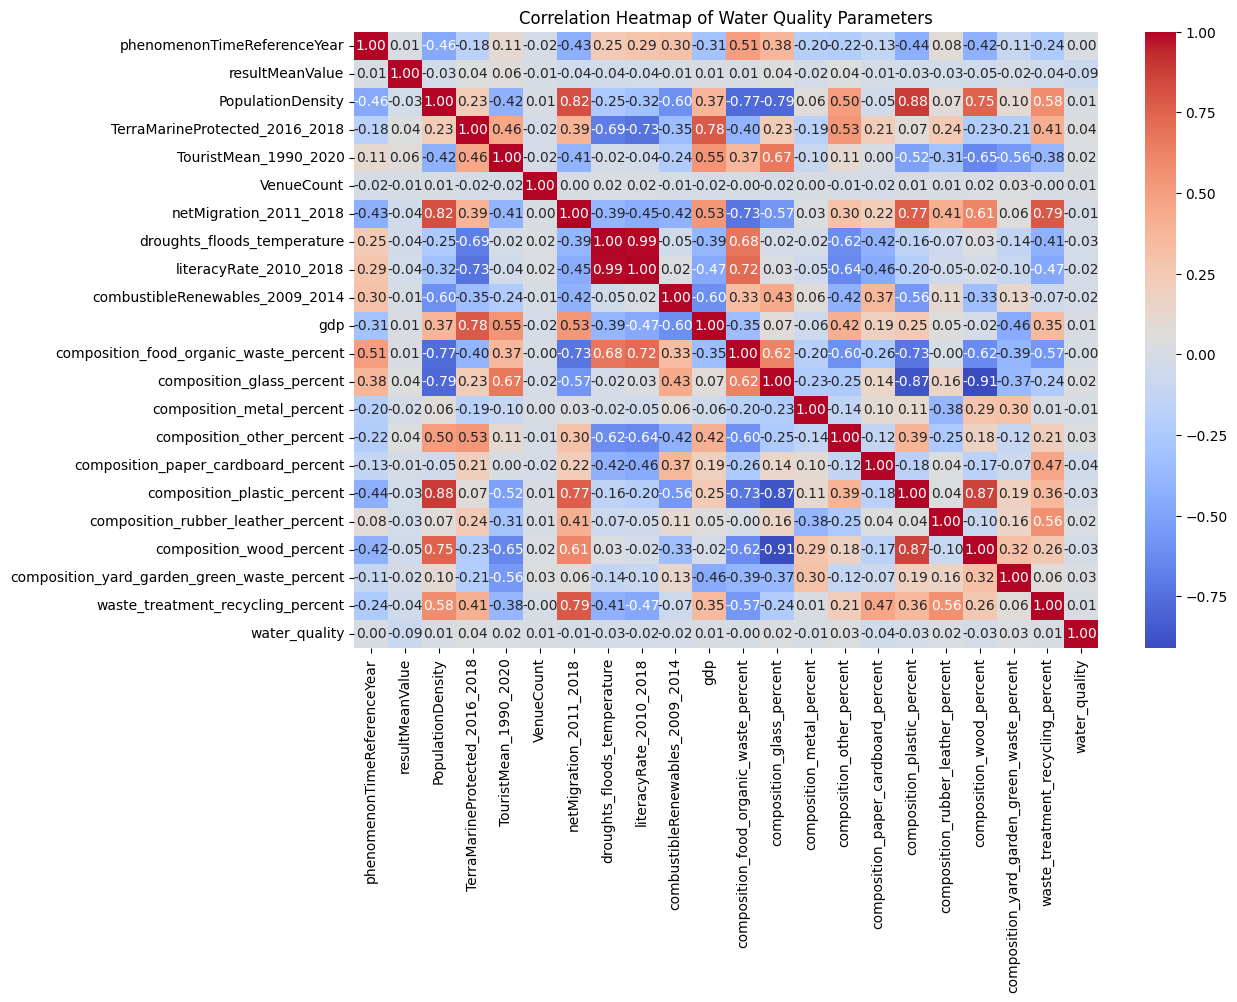

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_cols]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Parameters')
plt.show()

# Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18367 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   18367 non-null  object 
 1   observedPropertyDeterminandCode              18367 non-null  object 
 2   procedureAnalysedFraction                    18367 non-null  object 
 3   procedureAnalysedMedia                       18367 non-null  object 
 4   resultUom                                    18367 non-null  object 
 5   phenomenonTimeReferenceYear                  18367 non-null  int64  
 6   parameterSamplingPeriod                      18367 non-null  object 
 7   resultMeanValue                              18367 non-null  float64
 8   waterBodyIdentifier                          18367 non-null  object 
 9   Country                                      18367 non-null  object 
 10  Pop

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset

# Initialize the model
model = KNeighborsClassifier()

# Copy the dataframe to avoid modifying the original
data = df.copy()

# List of categorical columns to encode
columns_to_encode = ["parameterWaterBodyCategory", "observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"].values
x = data.drop(["water_quality"], axis=1)

# Function to fit data, train model, and return score
def fitData(x, y, model, usedCols):
    x_train, x_test, y_train, y_test = train_test_split(x[usedCols], y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

scores = []
usedCols = []

# Iterate through each feature
for col in x.columns:
    usedCols.append(col)
    score = fitData(x, y, model, usedCols)
    scores.append(score)
    # print(f"Accuracy with {col} Feature: {score}")
    # print("-" * 65)

# Optionally, you can print the sorted scores with corresponding feature names
sorted_scores = sorted(zip(scores, x.columns), reverse=True)
print("\nFeature Scores:")
for score, col in sorted_scores:
    print(f"Accuracy with {col} Feature: {score}")


Feature Scores:
Accuracy with resultMeanValue Feature: 0.9860279441117764
Accuracy with waterBodyIdentifier Feature: 0.8662674650698603
Accuracy with Country Feature: 0.8660860097985846
Accuracy with TouristMean_1990_2020 Feature: 0.862456904373072
Accuracy with PopulationDensity Feature: 0.8622754491017964
Accuracy with TerraMarineProtected_2016_2018 Feature: 0.8619125385592451
Accuracy with netMigration_2011_2018 Feature: 0.8617310832879695
Accuracy with VenueCount Feature: 0.8617310832879695
Accuracy with literacyRate_2010_2018 Feature: 0.8604608963890401
Accuracy with droughts_floods_temperature Feature: 0.8604608963890401
Accuracy with combustibleRenewables_2009_2014 Feature: 0.8604608963890401
Accuracy with resultUom Feature: 0.812375249500998
Accuracy with procedureAnalysedMedia Feature: 0.8111050626020686
Accuracy with procedureAnalysedFraction Feature: 0.8111050626020686
Accuracy with observedPropertyDeterminandCode Feature: 0.8109236073307929
Accuracy with parameterSamplingP

In [ ]:
df_train = df.loc[:, ['resultMeanValue', 'waterBodyIdentifier', 'Country', 'TouristMean_1990_2020', 'PopulationDensity',
                      'TerraMarineProtected_2016_2018', 'netMigration_2011_2018', 'VenueCount', 'literacyRate_2010_2018',
                      'droughts_floods_temperature', 'combustibleRenewables_2009_2014', 'resultUom', 'procedureAnalysedMedia',
                      'procedureAnalysedFraction', 'observedPropertyDeterminandCode', 'parameterSamplingPeriod', 'phenomenonTimeReferenceYear', 'water_quality']]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18367 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   resultMeanValue                  18367 non-null  float64
 1   waterBodyIdentifier              18367 non-null  object 
 2   Country                          18367 non-null  object 
 3   TouristMean_1990_2020            18367 non-null  float64
 4   PopulationDensity                18367 non-null  float64
 5   TerraMarineProtected_2016_2018   18367 non-null  float64
 6   netMigration_2011_2018           18367 non-null  float64
 7   VenueCount                       18367 non-null  float64
 8   literacyRate_2010_2018           18367 non-null  float64
 9   droughts_floods_temperature      18367 non-null  float64
 10  combustibleRenewables_2009_2014  18367 non-null  float64
 11  resultUom                        18367 non-null  object 
 12  procedureAnalysedMedia 

# Preprocessing Data


## Oversampling for imbalance target class

In [ ]:
!pip install -q imbalanced-learn

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Copy the dataframe to avoid modifying the original
data = df.copy()

# List of categorical columns to encode
columns_to_encode = ["parameterWaterBodyCategory", "observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"]
X = data.drop(["water_quality"], axis=1)
# Check the balance of the classes
print("Original class distribution:\n", y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Check the balance of the classes after applying SMOTE
print("\nResampled class distribution:\n", pd.Series(y).value_counts())

# Optional: Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X, columns=X.columns)
df_resampled['water_quality'] = y

print("\nResampled DataFrame:")
df_resampled.head()

Original class distribution:
 water_quality
0    12789
1     5578
Name: count, dtype: int64

Resampled class distribution:
 water_quality
0    12789
1    12789
Name: count, dtype: int64

Resampled DataFrame:


,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
0,2,2,1,0,8,2009,12,0.063310,1227,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
1,2,2,1,0,8,2009,12,0.046733,1385,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
2,2,24,1,0,17,2009,12,132.859000,1385,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
3,2,1,1,0,9,2009,12,11.578376,1439,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
4,2,1,1,0,9,2009,12,2.477792,311,21,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,0


In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.0699248 , -1.16959434,  0.0139828 , ..., -0.67712042,
        -0.36175765, -0.22825924],
       [ 0.0699248 , -1.16959434,  0.0139828 , ..., -0.67712042,
        -0.36175765, -0.22825924],
       [ 0.0699248 ,  1.79452209,  0.0139828 , ..., -0.67712042,
        -0.36175765, -0.22825924],
       ...,
       [ 0.0699248 ,  1.25559183,  0.0139828 , ...,  1.79546697,
         0.31160078,  0.61534876],
       [ 0.0699248 , -0.22646638,  0.0139828 , ...,  0.12972389,
         4.4215811 , -0.77432214],
       [ 0.0699248 , -1.30432691,  0.0139828 , ..., -0.67712042,
        -0.36175765, -0.22825924]])

# Model Training


In [ ]:
from sklearn.model_selection import train_test_split
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Skenario : Dengan Oversampling

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9139953088350273

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2577
           1       0.92      0.91      0.91      2539

    accuracy                           0.91      5116
   macro avg       0.91      0.91      0.91      5116
weighted avg       0.91      0.91      0.91      5116



In [ ]:
import h5py
import numpy as np

# Assuming `model` is your trained scikit-learn model
with h5py.File('knn_oversampling.h5', 'w') as hf:
    for i, param in enumerate(knn.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.996677091477717

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2577
           1       1.00      1.00      1.00      2539

    accuracy                           1.00      5116
   macro avg       1.00      1.00      1.00      5116
weighted avg       1.00      1.00      1.00      5116



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('decision_tree_oversampling.h5', 'w') as hf:
    for i, param in enumerate(decision_tree.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9939405785770133

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2577
           1       0.99      0.99      0.99      2539

    accuracy                           0.99      5116
   macro avg       0.99      0.99      0.99      5116
weighted avg       0.99      0.99      0.99      5116



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('random_forest_oversampling.h5', 'w') as hf:
    for i, param in enumerate(random_forest.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

###XGBoost

In [ ]:
from xgboost import XGBClassifier
# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.995113369820172

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2577
           1       0.99      1.00      1.00      2539

    accuracy                           1.00      5116
   macro avg       1.00      1.00      1.00      5116
weighted avg       1.00      1.00      1.00      5116



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('xgboost_model_oversampling.h5', 'w') as hf:
    for i, param in enumerate(xgboost_model.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; adjust accordingly for multiclass

In [ ]:
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 91393 (357.00 KB)
Trainable params: 91393 (357.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Increase the number of epochs
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
512/512 [==============================] - 5s 5ms/step - loss: 0.4446 - accuracy: 0.7961 - val_loss: 0.3717 - val_accuracy: 0.8361
Epoch 2/100
512/512 [==============================] - 2s 4ms/step - loss: 0.3348 - accuracy: 0.8531 - val_loss: 0.3118 - val_accuracy: 0.8681
Epoch 3/100
512/512 [==============================] - 2s 4ms/step - loss: 0.3027 - accuracy: 0.8636 - val_loss: 0.2582 - val_accuracy: 0.8849
Epoch 4/100
512/512 [==============================] - 2s 4ms/step - loss: 0.2770 - accuracy: 0.8788 - val_loss: 0.2488 - val_accuracy: 0.8967
Epoch 5/100
512/512 [==============================] - 3s 5ms/step - loss: 0.2597 - accuracy: 0.8872 - val_loss: 0.2710 - val_accuracy: 0.8822
Epoch 6/100
512/512 [==============================] - 3s 6ms/step - loss: 0.2474 - accuracy: 0.8945 - val_loss: 0.2279 - val_accuracy: 0.9008
Epoch 7/100
512/512 [==============================] - 2s 4ms/step - loss: 0.2430 - accuracy: 0.8950 - val_loss: 0.2199 - val_accuracy: 0.9089

In [ ]:
# Predict on the test set
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Adjust threshold for multiclass

160/160 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.9278733385457388


In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2577
           1       0.94      0.91      0.93      2539

    accuracy                           0.93      5116
   macro avg       0.93      0.93      0.93      5116
weighted avg       0.93      0.93      0.93      5116



In [ ]:
from tensorflow.keras.models import Sequential

# Assuming `model` is your trained Keras model
ann_model.save('ann_oversampling.h5')

## Skenario : Baseline

In [ ]:
# Copy the dataframe to avoid modifying the original
data = df.copy()

# List of categorical columns to encode
columns_to_encode = ["parameterWaterBodyCategory", "observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"]
X = data.drop(["water_quality"], axis=1)
# Check the balance of the classes
print("Original class distribution:\n", y.value_counts())

Original class distribution:
 water_quality
0    12789
1     5578
Name: count, dtype: int64


In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.07119515, -1.11690631,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515, -1.11690631,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  1.61225247,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       ...,
       [ 0.07119515, -1.24095898,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  1.73630514,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  0.49577842,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345]])

In [ ]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN

In [ ]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8941208492106696

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2554
           1       0.86      0.78      0.82      1120

    accuracy                           0.89      3674
   macro avg       0.88      0.86      0.87      3674
weighted avg       0.89      0.89      0.89      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('knn_baseline.h5', 'w') as hf:
    for i, param in enumerate(knn.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Decision Tree

In [ ]:
# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9989112683723462

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('decision_tree_baseline.h5', 'w') as hf:
    for i, param in enumerate(decision_tree.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Random Forest

In [ ]:
# Train Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9923788786064235

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2554
           1       0.99      0.98      0.99      1120

    accuracy                           0.99      3674
   macro avg       0.99      0.99      0.99      3674
weighted avg       0.99      0.99      0.99      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('random_forest_baseline.h5', 'w') as hf:
    for i, param in enumerate(random_forest.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### XGBoost

In [ ]:
# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.997550353837779

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       0.99      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('xgboost_model_baseline.h5', 'w') as hf:
    for i, param in enumerate(xgboost_model.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### ANN

In [ ]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; adjust accordingly for multiclass

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Increase the number of epochs
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
368/368 [==============================] - 3s 6ms/step - loss: 0.4647 - accuracy: 0.7778 - val_loss: 0.3846 - val_accuracy: 0.8193
Epoch 2/100
368/368 [==============================] - 1s 4ms/step - loss: 0.3583 - accuracy: 0.8378 - val_loss: 0.3392 - val_accuracy: 0.8670
Epoch 3/100
368/368 [==============================] - 2s 6ms/step - loss: 0.3235 - accuracy: 0.8543 - val_loss: 0.3384 - val_accuracy: 0.8431
Epoch 4/100
368/368 [==============================] - 2s 6ms/step - loss: 0.3151 - accuracy: 0.8580 - val_loss: 0.3182 - val_accuracy: 0.8452
Epoch 5/100
368/368 [==============================] - 1s 4ms/step - loss: 0.3009 - accuracy: 0.8676 - val_loss: 0.2886 - val_accuracy: 0.8697
Epoch 6/100
368/368 [==============================] - 1s 4ms/step - loss: 0.2898 - accuracy: 0.8697 - val_loss: 0.2939 - val_accuracy: 0.8785
Epoch 7/100
368/368 [==============================] - 1s 4ms/step - loss: 0.2725 - accuracy: 0.8800 - val_loss: 0.2762 - val_accuracy: 0.8717

In [ ]:
# Predict on the test set
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Adjust threshold for multiclass

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

115/115 [==============================] - 0s 2ms/step

Accuracy: 0.9237887860642352

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2554
           1       0.92      0.82      0.87      1120

    accuracy                           0.92      3674
   macro avg       0.92      0.90      0.91      3674
weighted avg       0.92      0.92      0.92      3674



In [ ]:
# Assuming `model` is your trained Keras model
ann_model.save('ann_baseline.h5')

## Skenario : Dengan Feature Selection

In [ ]:
data = df.loc[:, ['resultMeanValue', 'waterBodyIdentifier', 'Country', 'TouristMean_1990_2020', 'PopulationDensity',
                      'TerraMarineProtected_2016_2018', 'netMigration_2011_2018', 'VenueCount', 'literacyRate_2010_2018',
                      'droughts_floods_temperature', 'combustibleRenewables_2009_2014', 'resultUom', 'procedureAnalysedMedia',
                      'procedureAnalysedFraction', 'observedPropertyDeterminandCode', 'parameterSamplingPeriod', 'phenomenonTimeReferenceYear', 'water_quality']]

# List of categorical columns to encode
columns_to_encode = ["observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"]
X = data.drop(["water_quality"], axis=1)
# Check the balance of the classes
data

,resultMeanValue,waterBodyIdentifier,Country,TouristMean_1990_2020,PopulationDensity,TerraMarineProtected_2016_2018,netMigration_2011_2018,VenueCount,literacyRate_2010_2018,droughts_floods_temperature,combustibleRenewables_2009_2014,resultUom,procedureAnalysedMedia,procedureAnalysedFraction,observedPropertyDeterminandCode,parameterSamplingPeriod,phenomenonTimeReferenceYear,water_quality
0,0.063310,1227,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,8,0,1,2,12,2009,0
1,0.046733,1385,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,8,0,1,2,12,2009,0
2,132.859000,1385,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,17,0,1,24,12,2009,0
3,11.578376,1439,8,71176346.0,122.299437,30.831906,75808.375,2.0,0.000000,0.005718,4.457840,9,0,1,1,12,2009,1
5,2.477792,311,21,50941692.0,93.677197,15.047884,-40055.250,4.0,87.158924,0.729194,4.363288,9,0,1,1,12,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.092466,1935,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,8,0,1,2,12,2009,0
19996,89.908300,1935,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,0,0,1,7,12,2009,1
19997,18.901608,1937,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,9,0,1,1,12,2009,1
19998,307.307000,1937,8,71176346.0,122.299437,30.831906,75808.375,0.0,0.000000,0.005718,4.457840,17,0,1,25,12,2009,0


In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.29040809, -0.30943874, -0.71087809, ..., -1.11690631,
         0.33212422,  0.30256165],
       [-0.29054645, -0.09584684, -0.71087809, ..., -1.11690631,
         0.33212422,  0.30256165],
       [ 0.81796726, -0.09584684, -0.71087809, ...,  1.61225247,
         0.33212422,  0.30256165],
       ...,
       [-0.13317479,  0.65037294, -0.71087809, ..., -1.24095898,
         0.33212422,  0.30256165],
       [ 2.27399241,  0.65037294, -0.71087809, ...,  1.73630514,
         0.33212422,  0.30256165],
       [-0.22454208,  0.65037294, -0.71087809, ...,  0.49577842,
         0.33212422,  0.30256165]])

In [ ]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### KNN

In [ ]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8952095808383234

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2554
           1       0.86      0.78      0.82      1120

    accuracy                           0.90      3674
   macro avg       0.89      0.86      0.87      3674
weighted avg       0.89      0.90      0.89      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('knn_feature_selection.h5', 'w') as hf:
    for i, param in enumerate(knn.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Decision Tree

In [ ]:
# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9991834512792597

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('decision_tree_feature_selection.h5', 'w') as hf:
    for i, param in enumerate(decision_tree.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Random Forest

In [ ]:
# Train Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.995100707675558

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       0.99      0.99      0.99      1120

    accuracy                           1.00      3674
   macro avg       0.99      0.99      0.99      3674
weighted avg       1.00      1.00      1.00      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('random_forest_feature_selection.h5', 'w') as hf:
    for i, param in enumerate(random_forest.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### XGBoost

In [ ]:
# Train XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9972781709308656

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       0.99      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('xgboost_model_feature_selection.h5', 'w') as hf:
    for i, param in enumerate(xgboost_model.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### ANN

In [ ]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; adjust accordingly for multiclass

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Increase the number of epochs
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
368/368 [==============================] - 4s 6ms/step - loss: 0.4349 - accuracy: 0.7950 - val_loss: 0.3840 - val_accuracy: 0.8078
Epoch 2/100
368/368 [==============================] - 2s 6ms/step - loss: 0.3374 - accuracy: 0.8483 - val_loss: 0.3293 - val_accuracy: 0.8646
Epoch 3/100
368/368 [==============================] - 3s 8ms/step - loss: 0.3169 - accuracy: 0.8611 - val_loss: 0.3133 - val_accuracy: 0.8642
Epoch 4/100
368/368 [==============================] - 2s 5ms/step - loss: 0.3047 - accuracy: 0.8655 - val_loss: 0.3154 - val_accuracy: 0.8544
Epoch 5/100
368/368 [==============================] - 2s 4ms/step - loss: 0.2934 - accuracy: 0.8703 - val_loss: 0.3475 - val_accuracy: 0.8673
Epoch 6/100
368/368 [==============================] - 2s 5ms/step - loss: 0.2916 - accuracy: 0.8727 - val_loss: 0.3089 - val_accuracy: 0.8687
Epoch 7/100
368/368 [==============================] - 2s 5ms/step - loss: 0.2775 - accuracy: 0.8777 - val_loss: 0.2951 - val_accuracy: 0.8683

In [ ]:
# Predict on the test set
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Adjust threshold for multiclass

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

115/115 [==============================] - 0s 2ms/step

Accuracy: 0.9278715296679368

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2554
           1       0.94      0.82      0.87      1120

    accuracy                           0.93      3674
   macro avg       0.93      0.90      0.91      3674
weighted avg       0.93      0.93      0.93      3674



In [ ]:
# Assuming `model` is your trained Keras model
ann_model.save('ann_feature_selection.h5')

## Skenario : Dengan Hyperparameter Tuning

In [ ]:
# Copy the dataframe to avoid modifying the original
data = df.copy()

# List of categorical columns to encode
columns_to_encode = ["parameterWaterBodyCategory", "observedPropertyDeterminandCode",
                     "procedureAnalysedFraction", "procedureAnalysedMedia",
                     "resultUom", "parameterSamplingPeriod", "waterBodyIdentifier",
                     "Country"]

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features (x) and target (y)
y = data["water_quality"]
X = data.drop(["water_quality"], axis=1)
# Check the balance of the classes
data

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,water_quality
0,2,2,1,0,8,2009,12,0.063310,1227,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
1,2,2,1,0,8,2009,12,0.046733,1385,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
2,2,24,1,0,17,2009,12,132.859000,1385,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
3,2,1,1,0,9,2009,12,11.578376,1439,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
5,2,1,1,0,9,2009,12,2.477792,311,21,...,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,1,0,8,2009,12,0.092466,1935,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0
19996,2,7,1,0,0,2009,12,89.908300,1935,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
19997,2,1,1,0,9,2009,12,18.901608,1937,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,1
19998,2,25,1,0,17,2009,12,307.307000,1937,8,...,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26,0


In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.07119515, -1.11690631,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515, -1.11690631,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  1.61225247,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       ...,
       [ 0.07119515, -1.24095898,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  1.73630514,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345],
       [ 0.07119515,  0.49577842,  0.01650156, ..., -0.68297305,
        -0.36998599, -0.22594345]])

In [ ]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install -q optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


### KNN

In [ ]:
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Objective function to optimize
def objective(trial):
    # Suggest hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)

    # Train KNN model with suggested hyperparameters
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final KNN model with the best hyperparameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


[I 2024-06-29 08:09:26,184] A new study created in memory with name: no-name-4d44c19e-f529-4d51-8747-fad5b1968710
[I 2024-06-29 08:09:27,696] Trial 0 finished with value: 0.8933043004899293 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.8933043004899293.
[I 2024-06-29 08:09:28,281] Trial 1 finished with value: 0.9058247142079477 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.9058247142079477.
[I 2024-06-29 08:09:32,210] Trial 2 finished with value: 0.8712574850299402 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.9058247142079477.
[I 2024-06-29 08:09:33,269] Trial 3 finished with value: 0.8843222645617855 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.9058247142079477.
[I 2024-06-29 08:09:37,350] Trial 4 finished with value: 0.8900381056069678 and parameters: {'n_neighbors': 8, 'weights': 

Best hyperparameters: {'n_neighbors': 11, 'weights': 'distance', 'p': 1}

Accuracy: 0.9158954817637452

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2554
           1       0.90      0.82      0.86      1120

    accuracy                           0.92      3674
   macro avg       0.91      0.89      0.90      3674
weighted avg       0.92      0.92      0.91      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('knn_hyperparameter_tuning.h5', 'w') as hf:
    for i, param in enumerate(knn.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Decision Tree

In [ ]:
# Objective function to optimize
def objective(trial):
    # Suggest hyperparameters
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Train Decision Tree model with suggested hyperparameters
    decision_tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    decision_tree.fit(X_train, y_train)

    # Predict on the test set
    y_pred = decision_tree.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final Decision Tree model with the best hyperparameters
decision_tree = DecisionTreeClassifier(**best_params, random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[I 2024-06-29 08:13:35,529] A new study created in memory with name: no-name-fd1a3cd0-a0d7-484b-9313-8759b34b94ed
[I 2024-06-29 08:13:35,591] Trial 0 finished with value: 0.9980947196516059 and parameters: {'max_depth': 26, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9980947196516059.
[I 2024-06-29 08:13:35,642] Trial 1 finished with value: 0.9980947196516059 and parameters: {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9980947196516059.
[I 2024-06-29 08:13:35,692] Trial 2 finished with value: 0.9964616222101252 and parameters: {'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.9980947196516059.
[I 2024-06-29 08:13:35,709] Trial 3 finished with value: 0.6951551442569407 and parameters: {'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9980947196516059.
[I 2024-06-29 08:13:35,761] Trial 4 finished with value: 0.

Best hyperparameters: {'max_depth': 26, 'min_samples_split': 14, 'min_samples_leaf': 7}

Accuracy: 0.9980947196516059

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('decision_tree_hyperaparamater_tuning.h5', 'w') as hf:
    for i, param in enumerate(decision_tree.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### Random Forest

In [ ]:
from joblib import Parallel, delayed
import multiprocessing

In [ ]:
# Objective function to optimize
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

    # Train Random Forest model with suggested hyperparameters
    random_forest = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    random_forest.fit(X_train, y_train)

    # Predict on the test set
    y_pred = random_forest.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study
study = optuna.create_study(direction='maximize')

# Optimize the study with parallel execution
num_trials = 100
num_jobs = multiprocessing.cpu_count()

# Use Optuna's built-in parallel execution
study.optimize(objective, n_trials=num_trials, n_jobs=num_jobs)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final Random Forest model with the best hyperparameters
random_forest = RandomForestClassifier(**best_params, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[I 2024-06-29 08:17:17,232] A new study created in memory with name: no-name-67ad03d0-4e87-44dc-943d-7d24222c5e27
[I 2024-06-29 08:17:22,724] Trial 1 finished with value: 0.9793140990745781 and parameters: {'n_estimators': 111, 'max_depth': 32, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9793140990745781.
[I 2024-06-29 08:17:25,202] Trial 2 finished with value: 0.9643440391943386 and parameters: {'n_estimators': 72, 'max_depth': 31, 'min_samples_split': 14, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 1 with value: 0.9793140990745781.
[I 2024-06-29 08:17:28,388] Trial 0 finished with value: 0.987751769188895 and parameters: {'n_estimators': 226, 'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.987751769188895.
[I 2024-06-29 08:17:29,685] Trial 3 finished with value: 0.9744148067501361 and parameters: {'n_estimators': 114, 'max_depth': 22, '

Best hyperparameters: {'n_estimators': 265, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Accuracy: 0.9934676102340773

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2554
           1       0.99      0.99      0.99      1120

    accuracy                           0.99      3674
   macro avg       0.99      0.99      0.99      3674
weighted avg       0.99      0.99      0.99      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('random_forest_hyperparameter_tuning.h5', 'w') as hf:
    for i, param in enumerate(random_forest.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### XGBoost

In [ ]:
# Objective function to optimize
def objective(trial):
    # Suggest hyperparameters
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,  # For the iris dataset
        'eval_metric': 'mlogloss',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True)
    }

    # Train XGBoost model with suggested hyperparameters
    xgboost_model = XGBClassifier(**param, random_state=42)
    xgboost_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgboost_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study and optimize
study = optuna.create_study(direction='maximize')

# Optimize the study with parallel execution
num_trials = 100
num_jobs = multiprocessing.cpu_count()

# Use Optuna's built-in parallel execution
study.optimize(objective, n_trials=num_trials, n_jobs=num_jobs)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final XGBoost model with the best hyperparameters
xgboost_model = XGBClassifier(**best_params, random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[I 2024-06-29 08:22:11,448] A new study created in memory with name: no-name-ae693993-cdac-400c-a880-1ff0a93bac43
[I 2024-06-29 08:22:13,281] Trial 0 finished with value: 0.9970059880239521 and parameters: {'max_depth': 10, 'learning_rate': 0.17310418759688553, 'n_estimators': 212, 'gamma': 1.3652193419556986, 'min_child_weight': 8, 'subsample': 0.8106785670099343, 'colsample_bytree': 0.5017045687816328, 'lambda': 2.4095190527829606e-05, 'alpha': 0.11011868049352662}. Best is trial 0 with value: 0.9970059880239521.
[I 2024-06-29 08:22:13,451] Trial 1 finished with value: 0.9978225367446925 and parameters: {'max_depth': 8, 'learning_rate': 0.0867021558574306, 'n_estimators': 206, 'gamma': 1.4034732618378554, 'min_child_weight': 3, 'subsample': 0.6478695478123935, 'colsample_bytree': 0.9998834631328375, 'lambda': 0.0066545582219259165, 'alpha': 1.2366506311472113e-05}. Best is trial 1 with value: 0.9978225367446925.
[I 2024-06-29 08:22:16,834] Trial 2 finished with value: 0.9918345127925

Best hyperparameters: {'max_depth': 9, 'learning_rate': 0.09283228099529404, 'n_estimators': 694, 'gamma': 0.854278120823142, 'min_child_weight': 8, 'subsample': 0.7369669177054263, 'colsample_bytree': 0.7952753907384096, 'lambda': 1.6734670701600926e-05, 'alpha': 4.3247850625682514e-06}

Accuracy: 0.9964616222101252

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      0.99      0.99      1120

    accuracy                           1.00      3674
   macro avg       1.00      1.00      1.00      3674
weighted avg       1.00      1.00      1.00      3674



In [ ]:
# Assuming `model` is your trained scikit-learn model
with h5py.File('xgboost_model_hyperparameter_tuning.h5', 'w') as hf:
    for i, param in enumerate(xgboost_model.get_params().items()):
        hf.create_dataset(f'param_{i}', data=np.string_(str(param)))

### ANN

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import optuna
import multiprocessing
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.metrics import classification_report

# Add these imports for data preprocessing and splitting (if not already defined elsewhere in your code)
from sklearn.model_selection import train_test_split

In [ ]:
# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    n_layers = trial.suggest_int('n_layers', 1, 3)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid'])
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    batch_size = trial.suggest_int('batch_size', 16, 128)
    num_epochs = trial.suggest_int('num_epochs', 10, 100)

    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

    for i in range(n_layers):
        num_hidden = trial.suggest_int(f'n_units_l{i}', 4, 128)
        model.add(layers.Dense(num_hidden, activation=activation))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

    model.compile(optimizer=getattr(keras.optimizers, optimizer)(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    # Evaluate the model
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study and optimize with parallel execution
study = optuna.create_study(direction='maximize')

# Use Optuna's built-in parallel execution
num_trials = 100
num_jobs = multiprocessing.cpu_count()

# Ensure that the main study optimization is run within the "__name__ == '__main__'" block
if __name__ == "__main__":
    study.optimize(objective, n_trials=num_trials, n_jobs=num_jobs)

    # Get the best hyperparameters
    best_params = study.best_params
    print("Best hyperparameters:", best_params)

    # Train the final model with the best hyperparameters
    n_layers = best_params['n_layers']
    activation = best_params['activation']
    optimizer = best_params['optimizer']
    learning_rate = best_params['learning_rate']
    dropout_rate = best_params['dropout_rate']
    batch_size = best_params['batch_size']
    num_epochs = best_params['num_epochs']

    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

    for i in range(n_layers):
        num_hidden = best_params[f'n_units_l{i}']
        model.add(layers.Dense(num_hidden, activation=activation))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

    model.compile(optimizer=getattr(keras.optimizers, optimizer)(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    # Evaluate the final model
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)

    # Optional: Print classification report
    from sklearn.metrics import classification_report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

[I 2024-06-29 08:28:30,674] A new study created in memory with name: no-name-6f0c47e0-0c03-4f07-bed0-d317fac57012


115/115 [==============================] - 0s 1ms/step


[I 2024-06-29 08:28:54,826] Trial 0 finished with value: 0.6951551442569407 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 7.259422273925157e-05, 'dropout_rate': 0.36616424420835036, 'batch_size': 89, 'num_epochs': 20, 'n_units_l0': 48, 'n_units_l1': 28, 'n_units_l2': 7}. Best is trial 0 with value: 0.6951551442569407.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 08:29:13,503] Trial 1 finished with value: 0.8630919978225368 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.0010916384055576207, 'dropout_rate': 0.08125882699662546, 'batch_size': 73, 'num_epochs': 54, 'n_units_l0': 87, 'n_units_l1': 92, 'n_units_l2': 124}. Best is trial 1 with value: 0.8630919978225368.


115/115 [==============================] - 1s 5ms/step


[I 2024-06-29 08:29:40,529] Trial 2 finished with value: 0.8813282525857377 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.003272231843826715, 'dropout_rate': 0.47344781425460025, 'batch_size': 90, 'num_epochs': 62, 'n_units_l0': 122, 'n_units_l1': 105}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:30:29,600] Trial 3 finished with value: 0.7272727272727273 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 1.4965496895654133e-05, 'dropout_rate': 0.20060209621262093, 'batch_size': 51, 'num_epochs': 80, 'n_units_l0': 65}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:31:07,852] Trial 4 finished with value: 0.8402286336418073 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.0002803342743550717, 'dropout_rate': 0.08773350189612, 'batch_size': 73, 'num_epochs': 100, 'n_units_l0': 111, 'n_units_l1': 78, 'n_units_l2': 54}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:31:22,620] Trial 5 finished with value: 0.7528579205225912 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.032342895882193586, 'dropout_rate': 0.3392790264398481, 'batch_size': 87, 'num_epochs': 65, 'n_units_l0': 67, 'n_units_l1': 120}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 1s 8ms/step


[I 2024-06-29 08:31:59,032] Trial 6 finished with value: 0.6946107784431138 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0847953921870891, 'dropout_rate': 0.4718101470290831, 'batch_size': 92, 'num_epochs': 79, 'n_units_l0': 100}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 08:33:11,596] Trial 8 finished with value: 0.7955906369080021 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.0003617835884047596, 'dropout_rate': 0.1391952709634377, 'batch_size': 72, 'num_epochs': 88, 'n_units_l0': 61, 'n_units_l1': 4, 'n_units_l2': 18}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 08:34:01,365] Trial 9 finished with value: 0.8671747414262384 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.005590896804335091, 'dropout_rate': 0.3448763259712986, 'batch_size': 72, 'num_epochs': 63, 'n_units_l0': 15, 'n_units_l1': 52, 'n_units_l2': 14}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:35:16,834] Trial 7 finished with value: 0.7996733805117039 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.00019073380898406616, 'dropout_rate': 0.10342121897483836, 'batch_size': 21, 'num_epochs': 99, 'n_units_l0': 88}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 1s 5ms/step


[I 2024-06-29 08:36:01,927] Trial 11 finished with value: 0.869896570495373 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00504581040977736, 'dropout_rate': 0.47587929260284983, 'batch_size': 128, 'num_epochs': 37, 'n_units_l0': 125, 'n_units_l1': 128}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 1s 5ms/step


[I 2024-06-29 08:36:26,958] Trial 12 finished with value: 0.8761567773543821 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.005679003109501563, 'dropout_rate': 0.49356650353610854, 'batch_size': 126, 'num_epochs': 37, 'n_units_l0': 124, 'n_units_l1': 125}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 08:36:53,745] Trial 13 finished with value: 0.8783342406096897 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.006451966908979096, 'dropout_rate': 0.41398893501155426, 'batch_size': 128, 'num_epochs': 39, 'n_units_l0': 128, 'n_units_l1': 99}. Best is trial 2 with value: 0.8813282525857377.


115/115 [==============================] - 1s 6ms/step


[I 2024-06-29 08:37:21,224] Trial 10 finished with value: 0.8949373979314099 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0004133942523404206, 'dropout_rate': 0.22652664709840098, 'batch_size': 18, 'num_epochs': 80, 'n_units_l0': 22, 'n_units_l1': 112}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 08:37:25,725] Trial 14 finished with value: 0.8862275449101796 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.001650137841695138, 'dropout_rate': 0.4041797236312092, 'batch_size': 110, 'num_epochs': 47, 'n_units_l0': 106, 'n_units_l1': 95}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:39:02,108] Trial 15 finished with value: 0.8445835601524224 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0012243895898411022, 'dropout_rate': 0.2507765922857234, 'batch_size': 34, 'num_epochs': 71, 'n_units_l0': 7, 'n_units_l1': 102}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:39:28,951] Trial 17 finished with value: 0.7011431682090364 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 3.7877057045824245e-05, 'dropout_rate': 0.27839015056794986, 'batch_size': 113, 'num_epochs': 51, 'n_units_l0': 31}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 08:39:34,794] Trial 16 finished with value: 0.8840500816548721 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0009946284248330884, 'dropout_rate': 0.2586710598920842, 'batch_size': 19, 'num_epochs': 50, 'n_units_l0': 7, 'n_units_l1': 66}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 08:39:42,777] Trial 18 finished with value: 0.8530212302667393 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0006220986794001359, 'dropout_rate': 0.004590788425367254, 'batch_size': 49, 'num_epochs': 10, 'n_units_l0': 38, 'n_units_l1': 63}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 08:39:49,531] Trial 19 finished with value: 0.6937942297223735 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 6.363018914268941e-05, 'dropout_rate': 0.0022213208633375947, 'batch_size': 45, 'num_epochs': 10, 'n_units_l0': 32}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 08:39:58,518] Trial 20 finished with value: 0.6954273271638541 and parameters: {'n_layers': 1, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.00012231674400630941, 'dropout_rate': 0.18722610683866509, 'batch_size': 109, 'num_epochs': 25, 'n_units_l0': 82}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:40:12,082] Trial 21 finished with value: 0.8685356559608056 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.019468523232360955, 'dropout_rate': 0.192401594602943, 'batch_size': 105, 'num_epochs': 27, 'n_units_l0': 75, 'n_units_l1': 81}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:42:12,599] Trial 22 finished with value: 0.8679912901469787 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0023881086446150192, 'dropout_rate': 0.28121050903621736, 'batch_size': 16, 'num_epochs': 47, 'n_units_l0': 17, 'n_units_l1': 77}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 2s 13ms/step


[I 2024-06-29 08:42:16,232] Trial 23 finished with value: 0.874251497005988 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0019180903747096413, 'dropout_rate': 0.2909332411852171, 'batch_size': 18, 'num_epochs': 46, 'n_units_l0': 18, 'n_units_l1': 42}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:44:37,944] Trial 24 finished with value: 0.7599346761023408 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0006444694289337453, 'dropout_rate': 0.39705164883229116, 'batch_size': 26, 'num_epochs': 48, 'n_units_l0': 4, 'n_units_l1': 50}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 1s 7ms/step


[I 2024-06-29 08:44:41,478] Trial 25 finished with value: 0.8911268372346217 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0005042361420040114, 'dropout_rate': 0.40299141674442945, 'batch_size': 34, 'num_epochs': 74, 'n_units_l0': 51, 'n_units_l1': 115}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 08:46:28,115] Trial 26 finished with value: 0.8881328252585737 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0005503313857640607, 'dropout_rate': 0.23488779602501988, 'batch_size': 34, 'num_epochs': 59, 'n_units_l0': 49, 'n_units_l1': 113}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 08:47:02,511] Trial 27 finished with value: 0.894393032117583 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.0004656787719679214, 'dropout_rate': 0.393761538743739, 'batch_size': 38, 'num_epochs': 85, 'n_units_l0': 54, 'n_units_l1': 115}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 08:48:29,539] Trial 28 finished with value: 0.8908546543277083 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00041751810905167055, 'dropout_rate': 0.21218058186883493, 'batch_size': 39, 'num_epochs': 77, 'n_units_l0': 50, 'n_units_l1': 113, 'n_units_l2': 122}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:48:38,792] Trial 29 finished with value: 0.8851388132825259 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00022748673853357365, 'dropout_rate': 0.31479135651857854, 'batch_size': 61, 'num_epochs': 89, 'n_units_l0': 51, 'n_units_l1': 114, 'n_units_l2': 110}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 1ms/step


[I 2024-06-29 08:50:53,909] Trial 30 finished with value: 0.8682634730538922 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0001462773922344718, 'dropout_rate': 0.3140313621418018, 'batch_size': 59, 'num_epochs': 93, 'n_units_l0': 42, 'n_units_l1': 112, 'n_units_l2': 84}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 08:51:03,184] Trial 31 finished with value: 0.8312465977136636 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 9.966736391165291e-05, 'dropout_rate': 0.43209652514248187, 'batch_size': 58, 'num_epochs': 87, 'n_units_l0': 32, 'n_units_l1': 108}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:52:51,532] Trial 32 finished with value: 0.8688078388677191 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 9.45223546396942e-05, 'dropout_rate': 0.21674804665671663, 'batch_size': 35, 'num_epochs': 76, 'n_units_l0': 57, 'n_units_l1': 90, 'n_units_l2': 87}. Best is trial 10 with value: 0.8949373979314099.


115/115 [==============================] - 1s 6ms/step


[I 2024-06-29 08:53:14,085] Trial 33 finished with value: 0.9112683723462166 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00038360093599292433, 'dropout_rate': 0.1585196862448349, 'batch_size': 33, 'num_epochs': 76, 'n_units_l0': 56, 'n_units_l1': 119, 'n_units_l2': 88}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 08:54:37,669] Trial 34 finished with value: 0.8255307566684812 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 4.58904410165786e-05, 'dropout_rate': 0.16505233887030782, 'batch_size': 39, 'num_epochs': 70, 'n_units_l0': 40, 'n_units_l1': 119, 'n_units_l2': 46}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:55:27,709] Trial 35 finished with value: 0.8347849755035384 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 4.36514481279995e-05, 'dropout_rate': 0.1616676544110086, 'batch_size': 27, 'num_epochs': 70, 'n_units_l0': 73, 'n_units_l1': 120}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:57:08,989] Trial 36 finished with value: 0.8459444746869896 and parameters: {'n_layers': 2, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.0009021356210409682, 'dropout_rate': 0.4407830329231069, 'batch_size': 28, 'num_epochs': 83, 'n_units_l0': 73, 'n_units_l1': 128}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 08:58:21,067] Trial 37 finished with value: 0.8421339139902014 and parameters: {'n_layers': 2, 'activation': 'sigmoid', 'optimizer': 'RMSprop', 'learning_rate': 0.0008648136974860254, 'dropout_rate': 0.3734161287782434, 'batch_size': 24, 'num_epochs': 83, 'n_units_l0': 24, 'n_units_l1': 86}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 08:59:32,911] Trial 38 finished with value: 0.7318998366902558 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 1.2026644523346377e-05, 'dropout_rate': 0.37967464560149, 'batch_size': 42, 'num_epochs': 93, 'n_units_l0': 57, 'n_units_l1': 85}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 08:59:56,129] Trial 39 finished with value: 0.7787152966793686 and parameters: {'n_layers': 2, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 1.266598770385127e-05, 'dropout_rate': 0.10618741412221717, 'batch_size': 45, 'num_epochs': 94, 'n_units_l0': 57, 'n_units_l1': 104}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:00:58,522] Trial 40 finished with value: 0.8462166575939031 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.00029444898894171785, 'dropout_rate': 0.1154119607717283, 'batch_size': 53, 'num_epochs': 74, 'n_units_l0': 68}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:01:31,528] Trial 41 finished with value: 0.8973870440936309 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.00026286230004637885, 'dropout_rate': 0.06500828262224606, 'batch_size': 53, 'num_epochs': 74, 'n_units_l0': 63, 'n_units_l1': 94, 'n_units_l2': 91}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 09:02:36,876] Trial 43 finished with value: 0.8761567773543821 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0001759922939813506, 'dropout_rate': 0.144358908272557, 'batch_size': 82, 'num_epochs': 67, 'n_units_l0': 91, 'n_units_l1': 99, 'n_units_l2': 87}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:03:50,270] Trial 42 finished with value: 0.9036472509526402 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'RMSprop', 'learning_rate': 0.00041996177926898425, 'dropout_rate': 0.048534337615498524, 'batch_size': 31, 'num_epochs': 79, 'n_units_l0': 45, 'n_units_l1': 110, 'n_units_l2': 101}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 7ms/step


[I 2024-06-29 09:05:03,008] Trial 44 finished with value: 0.9090909090909091 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0004050693022405112, 'dropout_rate': 0.06845333255120162, 'batch_size': 32, 'num_epochs': 58, 'n_units_l0': 65, 'n_units_l1': 121, 'n_units_l2': 70}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 09:06:06,164] Trial 46 finished with value: 0.8905824714207947 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.00028690343366560535, 'dropout_rate': 0.047147284545730576, 'batch_size': 65, 'num_epochs': 60, 'n_units_l0': 65, 'n_units_l1': 107, 'n_units_l2': 101}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 09:06:41,562] Trial 45 finished with value: 0.9058247142079477 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0002400235853667933, 'dropout_rate': 0.06728717736173784, 'batch_size': 29, 'num_epochs': 81, 'n_units_l0': 64, 'n_units_l1': 108, 'n_units_l2': 99}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 0s 1ms/step


[I 2024-06-29 09:09:06,131] Trial 48 finished with value: 0.8293413173652695 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.000243773653918859, 'dropout_rate': 0.06055860014210414, 'batch_size': 29, 'num_epochs': 55, 'n_units_l0': 81, 'n_units_l1': 11, 'n_units_l2': 73}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 09:09:32,568] Trial 47 finished with value: 0.6709308655416439 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 2.445029308730714e-05, 'dropout_rate': 0.04170866352354802, 'batch_size': 30, 'num_epochs': 80, 'n_units_l0': 44, 'n_units_l1': 122, 'n_units_l2': 72}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:10:18,364] Trial 49 finished with value: 0.8108328796951552 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 2.080411517520881e-05, 'dropout_rate': 0.03496128017146918, 'batch_size': 52, 'num_epochs': 65, 'n_units_l0': 62, 'n_units_l1': 120, 'n_units_l2': 100}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 09:10:56,153] Trial 50 finished with value: 0.8652694610778443 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 7.792155401494419e-05, 'dropout_rate': 0.07635231040489929, 'batch_size': 51, 'num_epochs': 66, 'n_units_l0': 64, 'n_units_l1': 96, 'n_units_l2': 103}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 6ms/step


[I 2024-06-29 09:11:42,041] Trial 51 finished with value: 0.9082743603701687 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0031152532820468578, 'dropout_rate': 0.07722769563791564, 'batch_size': 45, 'num_epochs': 56, 'n_units_l0': 69, 'n_units_l1': 93, 'n_units_l2': 97}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:14:04,070] Trial 53 finished with value: 0.9014697876973327 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.002868026449121615, 'dropout_rate': 0.08786127680805911, 'batch_size': 23, 'num_epochs': 58, 'n_units_l0': 71, 'n_units_l1': 91, 'n_units_l2': 92}. Best is trial 33 with value: 0.9112683723462166.


115/115 [==============================] - 1s 5ms/step


[I 2024-06-29 09:14:29,693] Trial 52 finished with value: 0.9142623843222646 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.00035866547321639124, 'dropout_rate': 0.08370102285066389, 'batch_size': 22, 'num_epochs': 80, 'n_units_l0': 70, 'n_units_l1': 107, 'n_units_l2': 89}. Best is trial 52 with value: 0.9142623843222646.


115/115 [==============================] - 1s 8ms/step


[I 2024-06-29 09:16:03,935] Trial 55 finished with value: 0.8737071311921611 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.011059832135263261, 'dropout_rate': 0.024468092662213753, 'batch_size': 31, 'num_epochs': 41, 'n_units_l0': 79, 'n_units_l1': 106, 'n_units_l2': 110}. Best is trial 52 with value: 0.9142623843222646.


115/115 [==============================] - 1s 7ms/step


[I 2024-06-29 09:16:47,843] Trial 54 finished with value: 0.8056614044637996 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.011626965798588008, 'dropout_rate': 0.12081975816003362, 'batch_size': 22, 'num_epochs': 55, 'n_units_l0': 81, 'n_units_l1': 106, 'n_units_l2': 110}. Best is trial 52 with value: 0.9142623843222646.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:18:38,422] Trial 56 finished with value: 0.9028307022318999 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0014269949121524443, 'dropout_rate': 0.12203801622136608, 'batch_size': 22, 'num_epochs': 55, 'n_units_l0': 89, 'n_units_l1': 103, 'n_units_l2': 76}. Best is trial 52 with value: 0.9142623843222646.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 09:19:14,003] Trial 57 finished with value: 0.9052803483941209 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.001576720263710923, 'dropout_rate': 0.08912573396724685, 'batch_size': 44, 'num_epochs': 82, 'n_units_l0': 88, 'n_units_l1': 73, 'n_units_l2': 76}. Best is trial 52 with value: 0.9142623843222646.


115/115 [==============================] - 1s 9ms/step


[I 2024-06-29 09:21:06,640] Trial 58 finished with value: 0.9109961894393032 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.004227205745183522, 'dropout_rate': 0.0927886436941252, 'batch_size': 45, 'num_epochs': 98, 'n_units_l0': 45, 'n_units_l1': 125, 'n_units_l2': 59}. Best is trial 52 with value: 0.9142623843222646.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 09:21:50,811] Trial 59 finished with value: 0.9199782253674469 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0033168668430804365, 'dropout_rate': 0.018931388071464106, 'batch_size': 43, 'num_epochs': 97, 'n_units_l0': 94, 'n_units_l1': 73, 'n_units_l2': 57}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:23:31,922] Trial 60 finished with value: 0.9036472509526402 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0035297333293863057, 'dropout_rate': 0.13948944428844184, 'batch_size': 67, 'num_epochs': 91, 'n_units_l0': 96, 'n_units_l1': 124, 'n_units_l2': 59}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 09:25:15,908] Trial 61 finished with value: 0.9142623843222646 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.003958416353770581, 'dropout_rate': 0.02721677768106673, 'batch_size': 41, 'num_epochs': 99, 'n_units_l0': 115, 'n_units_l1': 128, 'n_units_l2': 56}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 09:25:23,332] Trial 62 finished with value: 0.907185628742515 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.008105519726962671, 'dropout_rate': 0.025606190574272755, 'batch_size': 48, 'num_epochs': 98, 'n_units_l0': 101, 'n_units_l1': 60, 'n_units_l2': 40}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 09:28:40,280] Trial 63 finished with value: 0.9069134458356015 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0038083719962740113, 'dropout_rate': 0.01853236589846302, 'batch_size': 42, 'num_epochs': 98, 'n_units_l0': 105, 'n_units_l1': 56, 'n_units_l2': 45}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:28:50,282] Trial 64 finished with value: 0.9033750680457268 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0035354451004094983, 'dropout_rate': 0.016684114444511136, 'batch_size': 42, 'num_epochs': 100, 'n_units_l0': 118, 'n_units_l1': 128, 'n_units_l2': 62}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 10ms/step


[I 2024-06-29 09:30:19,041] Trial 66 finished with value: 0.7675557974959173 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.03177003739288764, 'dropout_rate': 0.0947480898059036, 'batch_size': 78, 'num_epochs': 96, 'n_units_l0': 120, 'n_units_l1': 71, 'n_units_l2': 54}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 6ms/step


[I 2024-06-29 09:31:39,034] Trial 65 finished with value: 0.9178007621121393 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0023442730118133264, 'dropout_rate': 0.0016107709471495785, 'batch_size': 37, 'num_epochs': 100, 'n_units_l0': 117, 'n_units_l1': 127, 'n_units_l2': 62}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 09:33:10,969] Trial 67 finished with value: 0.8911268372346217 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.007896637858626926, 'dropout_rate': 0.0010349590872858472, 'batch_size': 35, 'num_epochs': 89, 'n_units_l0': 108, 'n_units_l1': 119, 'n_units_l2': 66}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 09:34:17,791] Trial 68 finished with value: 0.9085465432770822 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.004767991013611723, 'dropout_rate': 0.002912897159964291, 'batch_size': 36, 'num_epochs': 88, 'n_units_l0': 113, 'n_units_l1': 125, 'n_units_l2': 66}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 09:39:10,110] Trial 69 finished with value: 0.9006532389765922 and parameters: {'n_layers': 3, 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.0021299855795602774, 'dropout_rate': 0.04933175847342677, 'batch_size': 16, 'num_epochs': 97, 'n_units_l0': 115, 'n_units_l1': 125, 'n_units_l2': 52}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 09:40:23,872] Trial 70 finished with value: 0.9148067501360915 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.001951416614976301, 'dropout_rate': 0.055832161995701006, 'batch_size': 16, 'num_epochs': 100, 'n_units_l0': 113, 'n_units_l1': 37, 'n_units_l2': 55}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 09:42:34,985] Trial 71 finished with value: 0.8854109961894393 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0007093028267026067, 'dropout_rate': 0.03237042474164886, 'batch_size': 38, 'num_epochs': 94, 'n_units_l0': 100, 'n_units_l1': 33, 'n_units_l2': 36}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 09:44:49,286] Trial 72 finished with value: 0.8911268372346217 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0011492788907964573, 'dropout_rate': 0.03263821353882337, 'batch_size': 26, 'num_epochs': 95, 'n_units_l0': 127, 'n_units_l1': 32, 'n_units_l2': 57}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:46:44,177] Trial 73 finished with value: 0.8848666303756124 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.001033918615237481, 'dropout_rate': 0.05893561796006446, 'batch_size': 20, 'num_epochs': 91, 'n_units_l0': 124, 'n_units_l1': 16, 'n_units_l2': 55}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 6ms/step


[I 2024-06-29 09:48:08,913] Trial 75 finished with value: 0.9033750680457268 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.002314784592966881, 'dropout_rate': 0.10546395292152534, 'batch_size': 96, 'num_epochs': 100, 'n_units_l0': 110, 'n_units_l1': 117, 'n_units_l2': 80}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 09:50:29,717] Trial 74 finished with value: 0.9167120304844856 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.004788455397599285, 'dropout_rate': 0.055857135813403, 'batch_size': 18, 'num_epochs': 100, 'n_units_l0': 116, 'n_units_l1': 120, 'n_units_l2': 48}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:51:05,661] Trial 76 finished with value: 0.9126292868807839 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.004523924741207617, 'dropout_rate': 0.1767381314580448, 'batch_size': 33, 'num_epochs': 86, 'n_units_l0': 105, 'n_units_l1': 128, 'n_units_l2': 68}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 09:56:35,509] Trial 77 finished with value: 0.9118127381600436 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.006378205208266011, 'dropout_rate': 0.0145145141629215, 'batch_size': 16, 'num_epochs': 91, 'n_units_l0': 117, 'n_units_l1': 116, 'n_units_l2': 50}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 09:56:39,960] Trial 78 finished with value: 0.859009254218835 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.017419717299404874, 'dropout_rate': 0.16722899739764668, 'batch_size': 16, 'num_epochs': 85, 'n_units_l0': 116, 'n_units_l1': 115, 'n_units_l2': 32}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 10:01:43,647] Trial 80 finished with value: 0.9158954817637452 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.006520113337014189, 'dropout_rate': 0.05006651453653099, 'batch_size': 20, 'num_epochs': 91, 'n_units_l0': 103, 'n_units_l1': 127, 'n_units_l2': 49}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 10:03:02,701] Trial 79 finished with value: 0.9107240065323897 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.006257557326394187, 'dropout_rate': 0.020952488326437667, 'batch_size': 16, 'num_epochs': 92, 'n_units_l0': 116, 'n_units_l1': 115, 'n_units_l2': 47}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 8ms/step


[I 2024-06-29 10:06:09,470] Trial 81 finished with value: 0.8952095808383234 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.01064553107482535, 'dropout_rate': 0.05709993223657961, 'batch_size': 25, 'num_epochs': 85, 'n_units_l0': 104, 'n_units_l1': 44, 'n_units_l2': 45}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 8ms/step


[I 2024-06-29 10:07:03,888] Trial 82 finished with value: 0.8843222645617855 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.008166582456580725, 'dropout_rate': 0.014295953610342728, 'batch_size': 20, 'num_epochs': 86, 'n_units_l0': 103, 'n_units_l1': 128, 'n_units_l2': 49}. Best is trial 59 with value: 0.9199782253674469.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 10:11:11,002] Trial 83 finished with value: 0.9210669569951007 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.00765222065159635, 'dropout_rate': 0.014521115666023115, 'batch_size': 20, 'num_epochs': 96, 'n_units_l0': 110, 'n_units_l1': 127, 'n_units_l2': 49}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 10:12:30,073] Trial 84 finished with value: 0.9137180185084377 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005093135432210194, 'dropout_rate': 0.043096633019563235, 'batch_size': 19, 'num_epochs': 90, 'n_units_l0': 94, 'n_units_l1': 123, 'n_units_l2': 63}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 1s 5ms/step


[I 2024-06-29 10:16:36,399] Trial 85 finished with value: 0.874251497005988 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.016142571546404666, 'dropout_rate': 0.042924268517748984, 'batch_size': 19, 'num_epochs': 96, 'n_units_l0': 96, 'n_units_l1': 123, 'n_units_l2': 26}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 10:16:55,270] Trial 86 finished with value: 0.8775176918889493 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.01529021996890935, 'dropout_rate': 0.04064926780503456, 'batch_size': 19, 'num_epochs': 96, 'n_units_l0': 96, 'n_units_l1': 123, 'n_units_l2': 41}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 0s 3ms/step


[I 2024-06-29 10:21:11,235] Trial 87 finished with value: 0.9115405552531302 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0028096686034711337, 'dropout_rate': 0.034333951803391896, 'batch_size': 22, 'num_epochs': 95, 'n_units_l0': 111, 'n_units_l1': 123, 'n_units_l2': 62}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 10:22:20,317] Trial 88 finished with value: 0.9112683723462166 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0025576076862126153, 'dropout_rate': 0.07447601127163897, 'batch_size': 23, 'num_epochs': 99, 'n_units_l0': 112, 'n_units_l1': 112, 'n_units_l2': 63}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 10:25:35,700] Trial 89 finished with value: 0.8475775721284703 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.024470611341170633, 'dropout_rate': 0.07317218034904917, 'batch_size': 25, 'num_epochs': 100, 'n_units_l0': 121, 'n_units_l1': 110, 'n_units_l2': 63}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 1s 7ms/step


[I 2024-06-29 10:25:46,261] Trial 90 finished with value: 0.9031028851388133 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0019225229925349753, 'dropout_rate': 0.05081212131107463, 'batch_size': 27, 'num_epochs': 89, 'n_units_l0': 120, 'n_units_l1': 23, 'n_units_l2': 53}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 1s 6ms/step


[I 2024-06-29 10:28:46,155] Trial 91 finished with value: 0.9077299945563418 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0019170508671513984, 'dropout_rate': 0.05276875837589196, 'batch_size': 27, 'num_epochs': 90, 'n_units_l0': 108, 'n_units_l1': 22, 'n_units_l2': 53}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 10:29:14,228] Trial 92 finished with value: 0.9158954817637452 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005025016570218923, 'dropout_rate': 0.005829749100687787, 'batch_size': 28, 'num_epochs': 93, 'n_units_l0': 108, 'n_units_l1': 128, 'n_units_l2': 58}. Best is trial 83 with value: 0.9210669569951007.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 10:34:11,281] Trial 93 finished with value: 0.924877517691889 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0046211125414150405, 'dropout_rate': 0.010584191478053034, 'batch_size': 20, 'num_epochs': 93, 'n_units_l0': 108, 'n_units_l1': 128, 'n_units_l2': 41}. Best is trial 93 with value: 0.924877517691889.


115/115 [==============================] - 1s 3ms/step


[I 2024-06-29 10:34:39,154] Trial 94 finished with value: 0.9205225911812738 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005673943232353005, 'dropout_rate': 0.007143785769290964, 'batch_size': 20, 'num_epochs': 94, 'n_units_l0': 100, 'n_units_l1': 118, 'n_units_l2': 5}. Best is trial 93 with value: 0.924877517691889.


115/115 [==============================] - 1s 7ms/step


[I 2024-06-29 10:37:04,487] Trial 95 finished with value: 0.92732716385411 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005409373792191768, 'dropout_rate': 0.011470351109411197, 'batch_size': 29, 'num_epochs': 93, 'n_units_l0': 108, 'n_units_l1': 118, 'n_units_l2': 42}. Best is trial 95 with value: 0.92732716385411.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 10:40:03,487] Trial 96 finished with value: 0.6951551442569407 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.0719613901489675, 'dropout_rate': 0.00865062986090337, 'batch_size': 21, 'num_epochs': 93, 'n_units_l0': 108, 'n_units_l1': 119, 'n_units_l2': 16}. Best is trial 95 with value: 0.92732716385411.


115/115 [==============================] - 1s 5ms/step


[I 2024-06-29 10:40:30,391] Trial 97 finished with value: 0.9126292868807839 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.009161085863236117, 'dropout_rate': 0.010465451868126335, 'batch_size': 29, 'num_epochs': 93, 'n_units_l0': 109, 'n_units_l1': 119, 'n_units_l2': 10}. Best is trial 95 with value: 0.92732716385411.


115/115 [==============================] - 1s 4ms/step


[I 2024-06-29 10:43:28,199] Trial 98 finished with value: 0.9227000544365814 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.009465702246405961, 'dropout_rate': 0.0015026825464426654, 'batch_size': 29, 'num_epochs': 93, 'n_units_l0': 102, 'n_units_l1': 118, 'n_units_l2': 34}. Best is trial 95 with value: 0.92732716385411.


115/115 [==============================] - 0s 2ms/step


[I 2024-06-29 10:44:54,978] Trial 99 finished with value: 0.9254218835057159 and parameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005861077138941963, 'dropout_rate': 0.0036347543230273744, 'batch_size': 25, 'num_epochs': 97, 'n_units_l0': 102, 'n_units_l1': 43, 'n_units_l2': 5}. Best is trial 95 with value: 0.92732716385411.


Best hyperparameters: {'n_layers': 3, 'activation': 'sigmoid', 'optimizer': 'Adam', 'learning_rate': 0.005409373792191768, 'dropout_rate': 0.011470351109411197, 'batch_size': 29, 'num_epochs': 93, 'n_units_l0': 108, 'n_units_l1': 118, 'n_units_l2': 42}
115/115 [==============================] - 0s 3ms/step

Accuracy: 0.9227000544365814

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2554
           1       0.93      0.81      0.86      1120

    accuracy                           0.92      3674
   macro avg       0.92      0.89      0.91      3674
weighted avg       0.92      0.92      0.92      3674



In [ ]:
# Assuming `model` is your trained Keras model
model.save('ann_hyperparameter_tuning.h5')

In [ ]:
! mkdir out
! zip -r out/archive.zip . -x "out/*" -x ".*"

mkdir: cannot create directory ‘out’: File exists
  adding: decision_tree_oversampling.h5 (deflated 91%)
  adding: random_forest_feature_selection.h5 (deflated 91%)
  adding: xgboost_model_baseline.h5 (deflated 91%)
  adding: knn_feature_selection.h5 (deflated 92%)
  adding: water-quality-dataset.zip (stored 0%)
  adding: decision_tree_feature_selection.h5 (deflated 91%)
  adding: decision_tree_baseline.h5 (deflated 91%)
  adding: ann_oversampling.h5 (deflated 9%)
  adding: knn_baseline.h5 (deflated 92%)
  adding: knn_hyperparameter_tuning.h5 (deflated 92%)
  adding: waterPollution.csv (deflated 94%)
  adding: ann_hyperparameter_tuning.h5 (deflated 17%)
  adding: random_forest_baseline.h5 (deflated 91%)
  adding: random_forest_oversampling.h5 (deflated 91%)
  adding: random_forest_hyperparameter_tuning.h5 (deflated 91%)
  adding: knn_oversampling.h5 (deflated 92%)
  adding: xgboost_model_hyperparameter_tuning.h5 (deflated 91%)
  adding: ann_baseline.h5 (deflated 9%)
  adding: xgboost_m